In [1]:
%matplotlib nbagg
import wget, os, zipfile
import time
import os
print(os.getcwd())

C:\Users\Hope\Desktop\Final Project


In [2]:
# Function to construct a one-month electricity Day-Ahead-Market

def create_DAM_query(node, startyear, startmonth):
    oasis_website = 'oasis.caiso.com'
    context_path = 'oasisapi'
    url = f'http://{oasis_website}/{context_path}/SingleZip'
    resultformat = '6'
    queryname = 'PRC_LMP'
    version = '1'
    market_run_id = 'DAM'

    if startmonth == '12':
        endmonth = '01'
        endyear = f'{int(startyear) + 1}'
    else:
        endmonth = f'{(int(startmonth) + 1):02d}'
        endyear = startyear
    startdatetime = f'{startyear}{startmonth}01T08:00-0000'
    enddatetime = f'{endyear}{endmonth}01T07:00-0000'
    query = f'{url}?resultformat={resultformat}&queryname={queryname}\
    &version={version}&startdatetime={startdatetime}&enddatetime={enddatetime}\
    &market_run_id={market_run_id}&node={node}'

    print(query)
    return query
    

In [3]:
# Function to construct a one-month electricity Hour-Ahead-Scheduling-Process

def create_HASP_query(node, startyear, startmonth):
    oasis_website = 'oasis.caiso.com'
    context_path = 'oasisapi'
    url = f'http://{oasis_website}/{context_path}/SingleZip'
    resultformat = '6'
    queryname = 'PRC_HASP_LMP'
    version = '3'
    market_run_id = 'HASP'

    if startmonth == '12':
        endmonth = '01'
        endyear = f'{int(startyear) + 1}'
    else:
        endmonth = f'{(int(startmonth) + 1):02d}'
        endyear = startyear
    startdatetime = f'{startyear}{startmonth}01T08:00-0000'
    enddatetime = f'{endyear}{endmonth}01T07:00-0000'
    query = f'{url}?resultformat={resultformat}&queryname={queryname}\
        &version={version}&startdatetime={startdatetime}&enddatetime={enddatetime}\
        &market_run_id={market_run_id}&node={node}'
    print(query)
    return query

In [4]:
# Function to construct a GENERIC one-month .csv LMP price download

def price_query(queryname, version, startyear, startmonth, market_run_id, node):
    oasis_website = 'oasis.caiso.com'
    context_path = 'oasisapi'
    url = f'http://{oasis_website}/{context_path}/SingleZip'
    resultformat = '6'

    if startmonth == '12':
        endmonth = '01'
        endyear = f'{int(startyear) + 1}'
    else:
        endmonth = f'{(int(startmonth) + 1):02d}'
        endyear = startyear
        startdatetime = f'{startyear}{startmonth}01T08:00-0000'
        enddatetime = f'{endyear}{endmonth}01T07:00-0000'
        query = f'{url}?resultformat={resultformat}&queryname={queryname}&version={version}\
            &startdatetime={startdatetime}&enddatetime={enddatetime}\
            &market_run_id={market_run_id}&node={node}'
    print(query)
    return query

In [5]:
# Function to construct a GENERIC one-month .csv load (demand) forecast

def load_query(queryname, version, startyear, startmonth, market_run_id):
    oasis_website = 'oasis.caiso.com'
    context_path = 'oasisapi'
    url = f'http://{oasis_website}/{context_path}/SingleZip'
    resultformat = '6'

    if startmonth == '12':
        endmonth = '01'
        endyear = f'{int(startyear) + 1}'
    else:
        endmonth = f'{(int(startmonth) + 1):02d}'
        endyear = startyear
        startdatetime = f'{startyear}{startmonth}01T08:00-0000'
        enddatetime = f'{endyear}{endmonth}01T07:00-0000'
        query = f'{url}?resultformat={resultformat}&queryname={queryname}&version={version}\
            &market_run_id={market_run_id}&startdatetime={startdatetime}&enddatetime={enddatetime}'
    print(query)
    return query


In [6]:
# Get Energy Price Zipfiles (from CAISO OASIS website via API)
node = 'BAYSHOR2_1_N001'
for i in range(1, 2): #for i in range(1, 41):
    if i % 12 == 0:
        startyear = str(2016 + i//12 - 1)
        startmonth = f'{12:02d}'
    else:
        startyear = str(2016 + i//12)
        startmonth = f'{i%12:02d}'
    prc_qry = price_query('PRC_LMP','1',startyear,startmonth,'DAM', node)
    print(prc_qry)
    # Uncomment below 2 lines when running the first time to download files
    #wget.download(prc_qry)
    time.sleep(5)

http://oasis.caiso.com/oasisapi/SingleZip?resultformat=6&queryname=PRC_LMP&version=1            &startdatetime=20160101T08:00-0000&enddatetime=20160201T07:00-0000            &market_run_id=DAM&node=BAYSHOR2_1_N001
http://oasis.caiso.com/oasisapi/SingleZip?resultformat=6&queryname=PRC_LMP&version=1            &startdatetime=20160101T08:00-0000&enddatetime=20160201T07:00-0000            &market_run_id=DAM&node=BAYSHOR2_1_N001


In [7]:
# S2
for i in range(1, 2): #for i in range(1, 41):
    if i % 12 == 0:
        startyear = str(2016 + i//12 - 1)
        startmonth = f'{12:02d}'
    else:
        startyear = str(2016 + i//12)
        startmonth = f'{i%12:02d}'

    prc_qry = price_query('PRC_HASP_LMP','3',startyear,startmonth,'HASP',node)
    print(prc_qry)
# Uncomment when running the first time to download these files
    #wget.download(prc_qry, r'C:\Users\Hope\Documents\Final Project/')
    time.sleep(5)
    #wget.download(price_query('PRC_INTVL_LMP','3',startyear,startmonth,'RTM',node),r'C:\Users\Hope\Documents\Final Project/')
    time.sleep(5)


http://oasis.caiso.com/oasisapi/SingleZip?resultformat=6&queryname=PRC_HASP_LMP&version=3            &startdatetime=20160101T08:00-0000&enddatetime=20160201T07:00-0000            &market_run_id=HASP&node=BAYSHOR2_1_N001
http://oasis.caiso.com/oasisapi/SingleZip?resultformat=6&queryname=PRC_HASP_LMP&version=3            &startdatetime=20160101T08:00-0000&enddatetime=20160201T07:00-0000            &market_run_id=HASP&node=BAYSHOR2_1_N001


In [8]:
# S3

for i in range(1, 2): #for i in range(1, 41):
    if i % 12 == 0:
        startyear = str(2016 + i//12 - 1)
        startmonth = f'{12:02d}'
    else:
        startyear = str(2016 + i//12)
        startmonth = f'{i%12:02d}'
    qry1 = load_query('SLD_FCST','1',startyear, startmonth,'7DA',)
    print(qry1)
# Uncomment when running the first time to download these files
    #wget.download(qry1, 'raw_data3/caiso_downloads/caiso_7da_load_dl/')
    #time.sleep(5)

    qry2 = load_query('SLD_FCST','1',startyear,startmonth,'2DA',)
    print(qry2)
# Uncomment this
    #wget.download(qry2, 'raw_data3/caiso_downloads/caiso_2da_load_dl/')
    #time.sleep(5)

    qry3 = load_query('SLD_FCST','1',startyear,startmonth,'DAM',)
    print(qry3)
# Uncomment when running the first time to download these files
    #wget.download(qry3, 'raw_data3/caiso_downloads/caiso_dam_load_dl/')
    #time.sleep(5)

    qry4 = load_query('SLD_FCST','1', startyear, startmonth,'RTM',)
    print(qry4)
# Uncomment when running the first time to download these files
    #wget.download(qry4, 'raw_data3/caiso_downloads/caiso_rtm_load_dl/')
    #time.sleep(5)


http://oasis.caiso.com/oasisapi/SingleZip?resultformat=6&queryname=SLD_FCST&version=1            &market_run_id=7DA&startdatetime=20160101T08:00-0000&enddatetime=20160201T07:00-0000
http://oasis.caiso.com/oasisapi/SingleZip?resultformat=6&queryname=SLD_FCST&version=1            &market_run_id=7DA&startdatetime=20160101T08:00-0000&enddatetime=20160201T07:00-0000
http://oasis.caiso.com/oasisapi/SingleZip?resultformat=6&queryname=SLD_FCST&version=1            &market_run_id=2DA&startdatetime=20160101T08:00-0000&enddatetime=20160201T07:00-0000
http://oasis.caiso.com/oasisapi/SingleZip?resultformat=6&queryname=SLD_FCST&version=1            &market_run_id=2DA&startdatetime=20160101T08:00-0000&enddatetime=20160201T07:00-0000
http://oasis.caiso.com/oasisapi/SingleZip?resultformat=6&queryname=SLD_FCST&version=1            &market_run_id=DAM&startdatetime=20160101T08:00-0000&enddatetime=20160201T07:00-0000
http://oasis.caiso.com/oasisapi/SingleZip?resultformat=6&queryname=SLD_FCST&version=1     

In [9]:
# S4
# Single month download cell
caiso_dam_dl = 'raw_data3/caiso_downloads/caiso_dam_dl/'
caiso_hasp_dl = 'raw_data3/caiso_downloads/caiso_hasp_dl/'
node = 'BAYSHOR2_1_N001'
startyear = '2016'
startmonth = '05'
q1 = create_DAM_query(node, startyear, startmonth)
print(q1)
# Uncomment when running the first time to download these files
#wget.download(q1, caiso_dam_dl)
time.sleep(10)

http://oasis.caiso.com/oasisapi/SingleZip?resultformat=6&queryname=PRC_LMP    &version=1&startdatetime=20160501T08:00-0000&enddatetime=20160601T07:00-0000    &market_run_id=DAM&node=BAYSHOR2_1_N001
http://oasis.caiso.com/oasisapi/SingleZip?resultformat=6&queryname=PRC_LMP    &version=1&startdatetime=20160501T08:00-0000&enddatetime=20160601T07:00-0000    &market_run_id=DAM&node=BAYSHOR2_1_N001


In [10]:
# S5
q2 = create_HASP_query(node, startyear, startmonth)
print(q2)
# Uncomment when running the first time to download these files
#wget.download(q2, caiso_hasp_dl)

http://oasis.caiso.com/oasisapi/SingleZip?resultformat=6&queryname=PRC_HASP_LMP        &version=3&startdatetime=20160501T08:00-0000&enddatetime=20160601T07:00-0000        &market_run_id=HASP&node=BAYSHOR2_1_N001
http://oasis.caiso.com/oasisapi/SingleZip?resultformat=6&queryname=PRC_HASP_LMP        &version=3&startdatetime=20160501T08:00-0000&enddatetime=20160601T07:00-0000        &market_run_id=HASP&node=BAYSHOR2_1_N001


In [11]:
# S6
# Unzip Downloaded CAISO Files (to .csv Directories)
unzipped_caiso_dam = 'raw_data3/unzipped_caiso/unzipped_caiso_dam/'
unzipped_caiso_hasp = 'raw_data3/unzipped_caiso/unzipped_caiso_hasp/'
caiso_dam_dl = 'raw_data3/caiso_downloads/caiso_dam_dl/'
caiso_hasp_dl = 'raw_data3/caiso_downloads/caiso_hasp_dl/'
for item in os.listdir(caiso_dam_dl): # loop through items in dir
    if item.split('.')[-1] == 'zip': # check for zip extension
        file_name = f'{caiso_dam_dl}{item}' # get relative path of files
        print(f'unzipping... {file_name}')
        zip_ref = zipfile.ZipFile(file_name) # create zipfile object
        with zip_ref as target:target.extractall(unzipped_caiso_dam)
    else: continue


FileNotFoundError: [WinError 3] The system cannot find the path specified: 'raw_data3/caiso_downloads/caiso_dam_dl/'

In [12]:
# S7

for item in os.listdir(caiso_hasp_dl): # loop through items in dir
    if item.split('.')[-1] == 'zip': # check for zip extension
        file_name = f'{caiso_hasp_dl}{item}' # get relative path of files
        print(f'unzipping... {file_name}')
        zip_ref = zipfile.ZipFile(file_name) # create zipfile object

        with zip_ref as target:target.extractall(unzipped_caiso_hasp)
    else: continue


FileNotFoundError: [WinError 3] The system cannot find the path specified: 'raw_data3/caiso_downloads/caiso_hasp_dl/'

In [13]:
# S8
download_dir = 'raw_data3/caiso_downloads/caiso_rtm_dl/'
unzipped_target_dir = 'raw_data3/unzipped_caiso/unzipped_caiso_rtm/'
for item in os.listdir(download_dir): # loop through items in dir
    if item.split('.')[-1] == 'zip': # check for zip extension
        file_name = f'{download_dir}{item}' # get relative path of files
        print(f'unzipping... {file_name}')
        zip_ref = zipfile.ZipFile(file_name) # create zipfile object

        with zip_ref as target: target.extractall(unzipped_target_dir)
    else: continue

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'raw_data3/caiso_downloads/caiso_rtm_dl/'

In [14]:
# S9
def unzip_dir(download_dir, unzipped_target_dir):
    for item in os.listdir(download_dir): # loop through items in dir
        if item.split('.')[-1] == 'zip': # check for zip extension
            file_name = f'{download_dir}{item}' # get relative path of files
            print(f'unzipping... {file_name}')
            zip_ref = zipfile.ZipFile(file_name) # create zipfile object
            with zip_ref as target:target.extractall(unzipped_target_dir)
        else: continue


In [15]:
'''# Uncomment when running the first time to unzip
unzip_dir('raw_data3/caiso_downloads/caiso_7da_load_dl/',
 'raw_data3/unzipped_caiso/unzipped_caiso_7da_load/')
unzip_dir('raw_data3/caiso_downloads/caiso_2da_load_dl/',
 'raw_data3/unzipped_caiso/unzipped_caiso_2da_load/')
unzip_dir('raw_data3/caiso_downloads/caiso_dam_load_dl/',
 'raw_data3/unzipped_caiso/unzipped_caiso_dam_load/')
unzip_dir('raw_data3/caiso_downloads/caiso_rtm_load_dl/',
 'raw_data3/unzipped_caiso/unzipped_caiso_rtm_load/')'''

"# Uncomment when running the first time to unzip\nunzip_dir('raw_data3/caiso_downloads/caiso_7da_load_dl/',\n 'raw_data3/unzipped_caiso/unzipped_caiso_7da_load/')\nunzip_dir('raw_data3/caiso_downloads/caiso_2da_load_dl/',\n 'raw_data3/unzipped_caiso/unzipped_caiso_2da_load/')\nunzip_dir('raw_data3/caiso_downloads/caiso_dam_load_dl/',\n 'raw_data3/unzipped_caiso/unzipped_caiso_dam_load/')\nunzip_dir('raw_data3/caiso_downloads/caiso_rtm_load_dl/',\n 'raw_data3/unzipped_caiso/unzipped_caiso_rtm_load/')"

In [16]:
# S10
# *** Start Data_Acquisition_CA_Water_Levels
import wget, os, zipfile
import time
# Functions to Construct Queries (for Accessing CAISO OASIS API)
'''CSV download query format... hourly storage at a single reservoir
http://cdec.water.ca.gov/dynamicapp/req/CSVDataServlet?Stations=SHA&SensorNums=15&dur_code=
H&Start=2016-01-01&End=2019-05-06
Excel download query format... hourly storage at a single reservoir
http://cdec.water.ca.gov/dynamicapp/req/ExcelDataServlet?Stations=SHA&SensorNums=15&dur_code
=H&Start=2016-01-01&End=2019-05-06'''


'CSV download query format... hourly storage at a single reservoir\nhttp://cdec.water.ca.gov/dynamicapp/req/CSVDataServlet?Stations=SHA&SensorNums=15&dur_code=\nH&Start=2016-01-01&End=2019-05-06\nExcel download query format... hourly storage at a single reservoir\nhttp://cdec.water.ca.gov/dynamicapp/req/ExcelDataServlet?Stations=SHA&SensorNums=15&dur_code\n=H&Start=2016-01-01&End=2019-05-06'

In [17]:
# Function to construct a GENERIC one-month .csv download query
# for hourly reservoir storage amounts from the CA DWR API
# Parameter (string): reservoir alphabetic code
def res_stg_query(station):
    url = f'http://cdec.water.ca.gov/dynamicapp/req/CSVDataServlet'
    Stations = station
    SensorNums = '15'
    dur_code = 'H'
    Start = '2016-01-01'
    End = '2019-05-07'
    query = f'{url}?Stations={station}&SensorNums={SensorNums}\&dur_code={dur_code}&Start={Start}&End={End}'
    print(query)
    return query
res_stg_query('CLE')

http://cdec.water.ca.gov/dynamicapp/req/CSVDataServlet?Stations=CLE&SensorNums=15\&dur_code=H&Start=2016-01-01&End=2019-05-07


'http://cdec.water.ca.gov/dynamicapp/req/CSVDataServlet?Stations=CLE&SensorNums=15\\&dur_code=H&Start=2016-01-01&End=2019-05-07'

In [18]:
# S11
# Get Hourly Reservoir Storage Sensor Readings (in acre-feet from CA DWR website via API)
reservoirs_list = ['CLE', 'WHI', 'LEW', 'WRS',
 'COY', 'SHA', 'KES', 'ORO',
 'ANT', 'FRD', 'DAV', 'BUL',
 'ENG', 'FOL', 'UNV', 'LON',
 'ICH', 'NAT', 'INV', 'BER',
 'BLB', 'NHG', 'CMN', 'PAR',
 'DON', 'BRD', 'TUL', 'NML',
 'DNP', 'HTH', 'CHV', 'EXC',
 'BUC', 'HID', 'MIL', 'SNL',
 'PNF', 'TRM', 'SCC', 'ISB',
 'STP', 'INP', 'DNN', 'CCH',
 'PYM', 'CAS', 'PRR'
 ]
len(reservoirs_list)

47

In [19]:
for station in reservoirs_list:
    print(res_stg_query(station))
# Uncomment when running the first time to download these files
 #wget.download(res_stg_query(station), f'raw_data3/ca_dwr_dl/{station}_hrly_strg.csv')
 #time.sleep(5)

http://cdec.water.ca.gov/dynamicapp/req/CSVDataServlet?Stations=CLE&SensorNums=15\&dur_code=H&Start=2016-01-01&End=2019-05-07
http://cdec.water.ca.gov/dynamicapp/req/CSVDataServlet?Stations=CLE&SensorNums=15\&dur_code=H&Start=2016-01-01&End=2019-05-07
http://cdec.water.ca.gov/dynamicapp/req/CSVDataServlet?Stations=WHI&SensorNums=15\&dur_code=H&Start=2016-01-01&End=2019-05-07
http://cdec.water.ca.gov/dynamicapp/req/CSVDataServlet?Stations=WHI&SensorNums=15\&dur_code=H&Start=2016-01-01&End=2019-05-07
http://cdec.water.ca.gov/dynamicapp/req/CSVDataServlet?Stations=LEW&SensorNums=15\&dur_code=H&Start=2016-01-01&End=2019-05-07
http://cdec.water.ca.gov/dynamicapp/req/CSVDataServlet?Stations=LEW&SensorNums=15\&dur_code=H&Start=2016-01-01&End=2019-05-07
http://cdec.water.ca.gov/dynamicapp/req/CSVDataServlet?Stations=WRS&SensorNums=15\&dur_code=H&Start=2016-01-01&End=2019-05-07
http://cdec.water.ca.gov/dynamicapp/req/CSVDataServlet?Stations=WRS&SensorNums=15\&dur_code=H&Start=2016-01-01&End=201

In [20]:
# S12 skip
# Single reservoir download
# station = 'CLE'
# wget.download(res_stg_query(station), f'../ca_dwr_dl/{station}_hrly_strg.csv')

In [21]:
# S13
# *** Start Electricity_Prices_Dataframe
import pandas as pd
import numpy as np
import wget, os
import time
import glob
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
%matplotlib inline
sns.set_style('whitegrid')
# Day-Ahead-Market DataFrame
dam_orig_cols=['INTERVALSTARTTIME_GMT','OPR_DT','OPR_HR','NODE','MARKET_RUN_ID','LMP_TYPE','MW']
dam_new_cols =['start_datetime','date','hr_index','node','market','lmp_type','dam_price_per_mwh']
dam_rename_dict = {old: new for old, new in zip(dam_orig_cols, dam_new_cols)}
dam_rename_dict


{'INTERVALSTARTTIME_GMT': 'start_datetime',
 'OPR_DT': 'date',
 'OPR_HR': 'hr_index',
 'NODE': 'node',
 'MARKET_RUN_ID': 'market',
 'LMP_TYPE': 'lmp_type',
 'MW': 'dam_price_per_mwh'}

In [22]:
# S14
caiso_dam_df = pd.DataFrame(columns=dam_new_cols)
caiso_dam_df.head()

,start_datetime,date,hr_index,node,market,lmp_type,dam_price_per_mwh


In [23]:
# S15
for file in glob.glob(r'C:\Users\Hope\Documents\Final Project\unzipped_caiso\unzipped_caiso_dam\*.csv'):
    df = pd.read_csv(file, usecols=dam_orig_cols).rename(index=str,columns=dam_rename_dict)
    df = df[df.lmp_type == 'LMP']
    caiso_dam_df = caiso_dam_df.append(df, ignore_index=True)
print(caiso_dam_df.shape)
caiso_dam_df.head()


(1486, 7)


,start_datetime,date,hr_index,node,market,lmp_type,dam_price_per_mwh
0,2016-01-01T18:00:00-00:00,2016-01-01,11,BAYSHOR2_1_N001,DAM,LMP,24.36446
1,2016-01-02T03:00:00-00:00,2016-01-01,20,BAYSHOR2_1_N001,DAM,LMP,44.78095
2,2016-01-02T07:00:00-00:00,2016-01-01,24,BAYSHOR2_1_N001,DAM,LMP,30.46089
3,2016-01-01T09:00:00-00:00,2016-01-01,2,BAYSHOR2_1_N001,DAM,LMP,30.38613
4,2016-01-02T04:00:00-00:00,2016-01-01,21,BAYSHOR2_1_N001,DAM,LMP,41.51019


In [24]:
# ntc hr_index col
caiso_dam_df = caiso_dam_df.sort_values(by='start_datetime').reset_index(drop=True)
caiso_dam_df.head()

,start_datetime,date,hr_index,node,market,lmp_type,dam_price_per_mwh
0,2016-01-01T08:00:00-00:00,2016-01-01,1,BAYSHOR2_1_N001,DAM,LMP,31.69690
1,2016-01-01T09:00:00-00:00,2016-01-01,2,BAYSHOR2_1_N001,DAM,LMP,30.38613
2,2016-01-01T10:00:00-00:00,2016-01-01,3,BAYSHOR2_1_N001,DAM,LMP,30.29141
3,2016-01-01T11:00:00-00:00,2016-01-01,4,BAYSHOR2_1_N001,DAM,LMP,28.45127
4,2016-01-01T12:00:00-00:00,2016-01-01,5,BAYSHOR2_1_N001,DAM,LMP,28.66504


In [25]:
# ntc hr_index col
caiso_dam_df['start_datetime'] = pd.to_datetime(caiso_dam_df['start_datetime'])
caiso_dam_df.head()

,start_datetime,date,hr_index,node,market,lmp_type,dam_price_per_mwh
0,2016-01-01 08:00:00+00:00,2016-01-01,1,BAYSHOR2_1_N001,DAM,LMP,31.69690
1,2016-01-01 09:00:00+00:00,2016-01-01,2,BAYSHOR2_1_N001,DAM,LMP,30.38613
2,2016-01-01 10:00:00+00:00,2016-01-01,3,BAYSHOR2_1_N001,DAM,LMP,30.29141
3,2016-01-01 11:00:00+00:00,2016-01-01,4,BAYSHOR2_1_N001,DAM,LMP,28.45127
4,2016-01-01 12:00:00+00:00,2016-01-01,5,BAYSHOR2_1_N001,DAM,LMP,28.66504


In [26]:
caiso_dam_df.set_index('start_datetime', inplace=True)
caiso_dam_df.sort_index(inplace=True)
caiso_dam_df.head()

,date,hr_index,node,market,lmp_type,dam_price_per_mwh
start_datetime,,,,,,
2016-01-01 08:00:00+00:00,2016-01-01,1,BAYSHOR2_1_N001,DAM,LMP,31.69690
2016-01-01 09:00:00+00:00,2016-01-01,2,BAYSHOR2_1_N001,DAM,LMP,30.38613
2016-01-01 10:00:00+00:00,2016-01-01,3,BAYSHOR2_1_N001,DAM,LMP,30.29141
2016-01-01 11:00:00+00:00,2016-01-01,4,BAYSHOR2_1_N001,DAM,LMP,28.45127
2016-01-01 12:00:00+00:00,2016-01-01,5,BAYSHOR2_1_N001,DAM,LMP,28.66504


In [27]:
caiso_dam_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1486 entries, 2016-01-01 08:00:00+00:00 to 2016-06-01 06:00:00+00:00
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   date               1486 non-null   object 
 1   hr_index           1486 non-null   object 
 2   node               1486 non-null   object 
 3   market             1486 non-null   object 
 4   lmp_type           1486 non-null   object 
 5   dam_price_per_mwh  1486 non-null   float64
dtypes: float64(1), object(5)
memory usage: 81.3+ KB


In [28]:
# Hour-Ahead-Scheduling Process DataFrame (hour-ahead, 15-minute realtime market)
hasp_orig_cols=['INTERVALSTARTTIME_GMT','OPR_DT','OPR_HR','NODE','MARKET_RUN_ID','LMP_TYPE','MW']
hasp_new_cols =['start_datetime','date','hr_index','node','market','lmp_type','hasp_price_per_mwh']
hasp_rename_dict = {old: new for old, new in zip(hasp_orig_cols, hasp_new_cols)}
caiso_hasp_df = pd.DataFrame(columns=hasp_new_cols)
for file in glob.glob(r'C:\Users\Hope\Documents\Final Project\unzipped_caiso\unzipped_caiso_hasp\*.csv'):
    df = pd.read_csv(file, usecols=hasp_orig_cols).rename(index=str,columns=hasp_rename_dict)
    df = df[df.lmp_type == 'LMP']
    caiso_hasp_df = caiso_hasp_df.append(df, ignore_index=True)
print(caiso_hasp_df.shape)

(5924, 7)


In [29]:
caiso_hasp_df = caiso_hasp_df.sort_values(by='start_datetime').reset_index(drop=True)
caiso_hasp_df['start_datetime'] = pd.to_datetime(caiso_hasp_df['start_datetime'])
caiso_hasp_df.set_index('start_datetime', inplace=True)
caiso_hasp_df.sort_index(inplace=True)
caiso_hasp_df.head()


,date,hr_index,node,market,lmp_type,hasp_price_per_mwh
start_datetime,,,,,,
2016-01-01 08:00:00+00:00,2016-01-01,1,BAYSHOR2_1_N001,HASP,LMP,25.71969
2016-01-01 08:15:00+00:00,2016-01-01,1,BAYSHOR2_1_N001,HASP,LMP,24.54000
2016-01-01 08:30:00+00:00,2016-01-01,1,BAYSHOR2_1_N001,HASP,LMP,24.53352
2016-01-01 08:45:00+00:00,2016-01-01,1,BAYSHOR2_1_N001,HASP,LMP,24.15808
2016-01-01 09:00:00+00:00,2016-01-01,2,BAYSHOR2_1_N001,HASP,LMP,25.32248


In [30]:
caiso_hasp_df = caiso_hasp_df.resample('H').mean()
caiso_hasp_df.head()

,hasp_price_per_mwh
start_datetime,
2016-01-01 08:00:00+00:00,24.737823
2016-01-01 09:00:00+00:00,25.030977
2016-01-01 10:00:00+00:00,24.563877
2016-01-01 11:00:00+00:00,24.775715
2016-01-01 12:00:00+00:00,24.923320


In [31]:
print(caiso_hasp_df.shape)

(3647, 1)


In [32]:
# RTM DataFrame (realtime spot prices, 5-minute realtime settlements only)
rtm_orig_cols=['INTERVALSTARTTIME_GMT','OPR_DT','OPR_HR','NODE','MARKET_RUN_ID','LMP_TYPE','VALUE']
rtm_new_cols =['start_datetime','date','hr_index','node','market','lmp_type','rtm_price_per_mwh']
rtm_rename_dict = {old: new for old, new in zip(rtm_orig_cols, rtm_new_cols)}
caiso_rtm_df = pd.DataFrame(columns=rtm_new_cols)
for file in glob.glob(r'C:\Users\Hope\Documents\Final Project\unzipped_caiso/unzipped_caiso_rtm/*.csv'):
    df = pd.read_csv(file, usecols=rtm_orig_cols).rename(index=str,columns=rtm_rename_dict)
    df = df[df.lmp_type == 'LMP']
    caiso_rtm_df = caiso_rtm_df.append(df, ignore_index=True)
print(caiso_rtm_df.shape)

(8916, 7)


In [33]:
caiso_rtm_df = caiso_rtm_df.sort_values(by='start_datetime').reset_index(drop=True)
caiso_rtm_df['start_datetime'] = pd.to_datetime(caiso_rtm_df['start_datetime'])
caiso_rtm_df.set_index('start_datetime', inplace=True)
caiso_rtm_df.sort_index(inplace=True)
caiso_rtm_df.head()

,date,hr_index,node,market,lmp_type,rtm_price_per_mwh
start_datetime,,,,,,
2016-01-01 08:00:00+00:00,2016-01-01,1,BAYSHOR2_1_N001,RTM,LMP,25.53958
2016-01-01 08:05:00+00:00,2016-01-01,1,BAYSHOR2_1_N001,RTM,LMP,25.24638
2016-01-01 08:10:00+00:00,2016-01-01,1,BAYSHOR2_1_N001,RTM,LMP,25.54549
2016-01-01 08:15:00+00:00,2016-01-01,1,BAYSHOR2_1_N001,RTM,LMP,25.23638
2016-01-01 08:20:00+00:00,2016-01-01,1,BAYSHOR2_1_N001,RTM,LMP,25.23638


In [34]:
print(caiso_rtm_df.shape)

(8916, 6)


In [35]:
caiso_dam_df.head()

,date,hr_index,node,market,lmp_type,dam_price_per_mwh
start_datetime,,,,,,
2016-01-01 08:00:00+00:00,2016-01-01,1,BAYSHOR2_1_N001,DAM,LMP,31.69690
2016-01-01 09:00:00+00:00,2016-01-01,2,BAYSHOR2_1_N001,DAM,LMP,30.38613
2016-01-01 10:00:00+00:00,2016-01-01,3,BAYSHOR2_1_N001,DAM,LMP,30.29141
2016-01-01 11:00:00+00:00,2016-01-01,4,BAYSHOR2_1_N001,DAM,LMP,28.45127
2016-01-01 12:00:00+00:00,2016-01-01,5,BAYSHOR2_1_N001,DAM,LMP,28.66504


In [36]:
# Join DAM + HASP + RTM LMP's Into a Single DataFrame
elec_prices_hrly = caiso_dam_df.drop(columns=['market', 'lmp_type'])
print(elec_prices_hrly.shape)

(1486, 4)


In [37]:
elec_prices_hrly.head()

,date,hr_index,node,dam_price_per_mwh
start_datetime,,,,
2016-01-01 08:00:00+00:00,2016-01-01,1,BAYSHOR2_1_N001,31.69690
2016-01-01 09:00:00+00:00,2016-01-01,2,BAYSHOR2_1_N001,30.38613
2016-01-01 10:00:00+00:00,2016-01-01,3,BAYSHOR2_1_N001,30.29141
2016-01-01 11:00:00+00:00,2016-01-01,4,BAYSHOR2_1_N001,28.45127
2016-01-01 12:00:00+00:00,2016-01-01,5,BAYSHOR2_1_N001,28.66504


In [38]:
elec_prices_hrly = elec_prices_hrly.merge(caiso_hasp_df[['hasp_price_per_mwh']],how='outer',left_index = True,right_index = True)
print(elec_prices_hrly.shape)

(3647, 5)


In [39]:
elec_prices_hrly.head(15)

,date,hr_index,node,dam_price_per_mwh,hasp_price_per_mwh
start_datetime,,,,,
2016-01-01 08:00:00+00:00,2016-01-01,1,BAYSHOR2_1_N001,31.69690,24.737823
2016-01-01 09:00:00+00:00,2016-01-01,2,BAYSHOR2_1_N001,30.38613,25.030977
2016-01-01 10:00:00+00:00,2016-01-01,3,BAYSHOR2_1_N001,30.29141,24.563877
2016-01-01 11:00:00+00:00,2016-01-01,4,BAYSHOR2_1_N001,28.45127,24.775715
2016-01-01 12:00:00+00:00,2016-01-01,5,BAYSHOR2_1_N001,28.66504,24.923320
2016-01-01 13:00:00+00:00,2016-01-01,6,BAYSHOR2_1_N001,29.84836,25.353155
2016-01-01 14:00:00+00:00,2016-01-01,7,BAYSHOR2_1_N001,31.32447,24.827470
2016-01-01 15:00:00+00:00,2016-01-01,8,BAYSHOR2_1_N001,30.84077,24.542012
2016-01-01 16:00:00+00:00,2016-01-01,9,BAYSHOR2_1_N001,28.37561,23.686425


In [40]:
elec_prices_hrly = elec_prices_hrly.merge(caiso_rtm_df[['rtm_price_per_mwh']],how='outer',left_index = True,right_index = True)
print(elec_prices_hrly.shape)

(11820, 6)


In [41]:
elec_prices_hrly.head()

,date,hr_index,node,dam_price_per_mwh,hasp_price_per_mwh,rtm_price_per_mwh
start_datetime,,,,,,
2016-01-01 08:00:00+00:00,2016-01-01,1,BAYSHOR2_1_N001,31.6969,24.737823,25.53958
2016-01-01 08:05:00+00:00,NaN,NaN,NaN,NaN,NaN,25.24638
2016-01-01 08:10:00+00:00,NaN,NaN,NaN,NaN,NaN,25.54549
2016-01-01 08:15:00+00:00,NaN,NaN,NaN,NaN,NaN,25.23638
2016-01-01 08:20:00+00:00,NaN,NaN,NaN,NaN,NaN,25.23638


In [42]:
elec_prices_hrly.shape

(11820, 6)

In [43]:
print(elec_prices_hrly.shape)
print(elec_prices_hrly.isna().sum())

(11820, 6)
date                  10334
hr_index              10334
node                  10334
dam_price_per_mwh     10334
hasp_price_per_mwh    10339
rtm_price_per_mwh      2904
dtype: int64


In [44]:
elec_prices_hrly = elec_prices_hrly[elec_prices_hrly.hasp_price_per_mwh.notna()]
print(elec_prices_hrly.shape)
print(elec_prices_hrly.isna().sum())
#elec_prices_hrly.isna().sum()

(1481, 6)
date                    0
hr_index                0
node                    0
dam_price_per_mwh       0
hasp_price_per_mwh      0
rtm_price_per_mwh     741
dtype: int64


In [45]:
elec_prices_hrly[elec_prices_hrly.rtm_price_per_mwh.isna()]

,date,hr_index,node,dam_price_per_mwh,hasp_price_per_mwh,rtm_price_per_mwh
start_datetime,,,,,,
2016-05-01 08:00:00+00:00,2016-05-01,2,BAYSHOR2_1_N001,22.54405,21.067010,NaN
2016-05-01 09:00:00+00:00,2016-05-01,3,BAYSHOR2_1_N001,21.53652,31.299150,NaN
2016-05-01 10:00:00+00:00,2016-05-01,4,BAYSHOR2_1_N001,23.57626,25.541300,NaN
2016-05-01 11:00:00+00:00,2016-05-01,5,BAYSHOR2_1_N001,22.76185,28.699828,NaN
2016-05-01 12:00:00+00:00,2016-05-01,6,BAYSHOR2_1_N001,23.71483,24.964055,NaN
...,...,...,...,...,...,...
2016-06-01 02:00:00+00:00,2016-05-31,20,BAYSHOR2_1_N001,42.45745,26.489750,NaN
2016-06-01 03:00:00+00:00,2016-05-31,21,BAYSHOR2_1_N001,43.69572,38.992793,NaN
2016-06-01 04:00:00+00:00,2016-05-31,22,BAYSHOR2_1_N001,31.92311,46.510415,NaN


In [46]:
elec_prices_hrly.isna().sum().sum()

741

In [47]:
elec_prices_hrly.rtm_price_per_mwh.fillna(method='ffill', inplace=True)
elec_prices_hrly.isna().sum().sum()


0

In [48]:
elec_prices_hrly.head()

,date,hr_index,node,dam_price_per_mwh,hasp_price_per_mwh,rtm_price_per_mwh
start_datetime,,,,,,
2016-01-01 08:00:00+00:00,2016-01-01,1,BAYSHOR2_1_N001,31.69690,24.737823,25.53958
2016-01-01 09:00:00+00:00,2016-01-01,2,BAYSHOR2_1_N001,30.38613,25.030977,25.79172
2016-01-01 10:00:00+00:00,2016-01-01,3,BAYSHOR2_1_N001,30.29141,24.563877,24.55509
2016-01-01 11:00:00+00:00,2016-01-01,4,BAYSHOR2_1_N001,28.45127,24.775715,24.69287
2016-01-01 12:00:00+00:00,2016-01-01,5,BAYSHOR2_1_N001,28.66504,24.923320,22.28447


In [49]:
print(elec_prices_hrly.shape)

(1481, 6)


In [50]:
elec_prices_hrly.to_csv(r'C:\Users\Hope\Documents\Final Project\data\elec_prices_hrly.csv')
plt.figure(figsize=(15,9))

<Figure size 1080x648 with 0 Axes>

<Figure size 1080x648 with 0 Axes>

Text(0.5, 1.0, 'Electricty Prices (hrly): Realtime vs. Hour-ahead vs. Day-ahead')

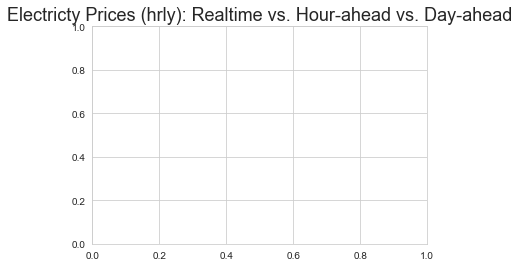

In [51]:
plt.title('Electricty Prices (hrly): Realtime vs. Hour-ahead vs. Day-ahead', fontsize=18)

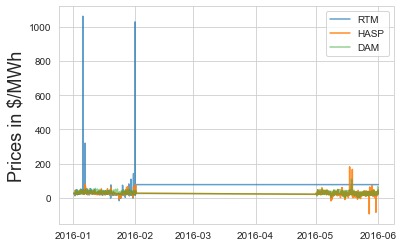

In [52]:
plt.plot(elec_prices_hrly.index,elec_prices_hrly.rtm_price_per_mwh,label = 'RTM', alpha=0.7)
plt.plot(elec_prices_hrly.index,elec_prices_hrly.hasp_price_per_mwh,label= 'HASP', alpha=0.9)
plt.plot(elec_prices_hrly.index,elec_prices_hrly.dam_price_per_mwh,label = 'DAM', alpha=0.5)
plt.ylabel('Prices in $/MWh', fontsize=18)
plt.legend()
plt.savefig(r'C:\Users\Hope\Documents\Final Project\Images\elec_prices_hrly.jpg', bbox_inches='tight');

In [53]:
# *** End of 2a_Electricity_Prices_Dataframe

In [54]:
import pandas as pd
import numpy as np
import wget, os
import time
import glob
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
%matplotlib inline
sns.set_style('whitegrid')

In [55]:
# *** Start Electricity_Demand_Fcast_Dataframe
# 7-Day-Ahead Demand Forecast DataFrame
sev_da_load_orig_cols=['INTERVALSTARTTIME_GMT','OPR_DT','OPR_HR','TAC_AREA_NAME','MW']
sev_da_load_new_cols =['start_datetime','date','hr_index','area','7da_load_fcast_mw']
sev_da_load_rename_dict = {old: new for old, new in zip(sev_da_load_orig_cols,sev_da_load_new_cols)}
sev_da_load_rename_dict
sev_da_load_df = pd.DataFrame(columns=sev_da_load_new_cols)
sev_da_load_df.head()

,start_datetime,date,hr_index,area,7da_load_fcast_mw


In [56]:
for file in glob.glob(r'C:\Users\Hope\Documents\Final Project\unzipped_caiso\unzipped_caiso_7da_load\*.csv'):
    df = pd.read_csv(file, usecols=sev_da_load_orig_cols).rename(index=str,columns=sev_da_load_rename_dict)
    df = df[df.area == 'CA ISO-TAC']
    sev_da_load_df = sev_da_load_df.append(df, ignore_index=True)
print(sev_da_load_df.shape)


(743, 5)


In [57]:
sev_da_load_df.head()

,start_datetime,date,hr_index,area,7da_load_fcast_mw
0,2016-01-01T22:00:00-00:00,2016-01-01,15,CA ISO-TAC,20731.98
1,2016-01-02T01:00:00-00:00,2016-01-01,18,CA ISO-TAC,25520.07
2,2016-01-01T19:00:00-00:00,2016-01-01,12,CA ISO-TAC,21321.83
3,2016-01-01T15:00:00-00:00,2016-01-01,8,CA ISO-TAC,21422.95
4,2016-01-01T12:00:00-00:00,2016-01-01,5,CA ISO-TAC,20490.69


In [58]:
sev_da_load_df = sev_da_load_df.sort_values(by='start_datetime').reset_index(drop=True)
sev_da_load_df['start_datetime'] = pd.to_datetime(sev_da_load_df['start_datetime'])
sev_da_load_df.set_index('start_datetime', inplace=True)
sev_da_load_df.sort_index(inplace=True)
sev_da_load_df.head()

,date,hr_index,area,7da_load_fcast_mw
start_datetime,,,,
2016-01-01 08:00:00+00:00,2016-01-01,1,CA ISO-TAC,22232.26
2016-01-01 09:00:00+00:00,2016-01-01,2,CA ISO-TAC,21515.00
2016-01-01 10:00:00+00:00,2016-01-01,3,CA ISO-TAC,20854.85
2016-01-01 11:00:00+00:00,2016-01-01,4,CA ISO-TAC,20495.68
2016-01-01 12:00:00+00:00,2016-01-01,5,CA ISO-TAC,20490.69


In [59]:
sev_da_load_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 743 entries, 2016-01-01 08:00:00+00:00 to 2016-02-01 06:00:00+00:00
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   date               743 non-null    object 
 1   hr_index           743 non-null    object 
 2   area               743 non-null    object 
 3   7da_load_fcast_mw  743 non-null    float64
dtypes: float64(1), object(3)
memory usage: 29.0+ KB


In [60]:
# 2-Day-Ahead Demand Forecast DataFrame
two_da_load_orig_cols=['INTERVALSTARTTIME_GMT','OPR_DT','OPR_HR','TAC_AREA_NAME','MW']
two_da_load_new_cols =['start_datetime','date','hr_index','area','2da_load_fcast_mw']
two_da_load_rename_dict = {old: new for old, new in zip(two_da_load_orig_cols,two_da_load_new_cols)}
two_da_load_df = pd.DataFrame(columns=two_da_load_new_cols)
for file in glob.glob(r'C:\Users\Hope\Documents\Final Project\unzipped_caiso\unzipped_caiso_2da_load\*.csv'):
    df = pd.read_csv(file, usecols=two_da_load_orig_cols).rename(index=str,columns=two_da_load_rename_dict)
    df = df[df.area == 'CA ISO-TAC']
two_da_load_df = two_da_load_df.append(df, ignore_index=True)
two_da_load_df.shape

(743, 5)

In [61]:
two_da_load_df = two_da_load_df.sort_values(by='start_datetime').reset_index(drop=True)
two_da_load_df['start_datetime'] = pd.to_datetime(two_da_load_df['start_datetime'])
two_da_load_df.set_index('start_datetime', inplace=True)
two_da_load_df.sort_index(inplace=True)
two_da_load_df.head()

,date,hr_index,area,2da_load_fcast_mw
start_datetime,,,,
2016-01-01 08:00:00+00:00,2016-01-01,1,CA ISO-TAC,22872.01
2016-01-01 09:00:00+00:00,2016-01-01,2,CA ISO-TAC,22070.77
2016-01-01 10:00:00+00:00,2016-01-01,3,CA ISO-TAC,21419.40
2016-01-01 11:00:00+00:00,2016-01-01,4,CA ISO-TAC,20997.22
2016-01-01 12:00:00+00:00,2016-01-01,5,CA ISO-TAC,21008.41


In [62]:
two_da_load_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 743 entries, 2016-01-01 08:00:00+00:00 to 2016-02-01 06:00:00+00:00
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   date               743 non-null    object 
 1   hr_index           743 non-null    object 
 2   area               743 non-null    object 
 3   2da_load_fcast_mw  743 non-null    float64
dtypes: float64(1), object(3)
memory usage: 29.0+ KB


In [63]:
# Day-Ahead Demand Forecast DataFrame
dam_load_orig_cols=['INTERVALSTARTTIME_GMT','OPR_DT', 'OPR_HR', 'TAC_AREA_NAME', 'MW']
dam_load_new_cols =['start_datetime', 'date', 'hr_index', 'area', 'dam_load_fcast_mw']
#dam_load_rename_dict = {old: new for old, new in zip(dam_load_orig_cols,
dam_load_rename_dict = {old: new for old, new in zip(dam_load_orig_cols, dam_load_new_cols)}
dam_load_df = pd.DataFrame(columns=dam_load_new_cols)
for file in glob.glob(r'C:\Users\Hope\Documents\Final Project\unzipped_caiso\unzipped_caiso_dam_load\*.csv'):
    df = pd.read_csv(file, usecols=dam_load_orig_cols).rename(index=str,columns=dam_load_rename_dict)
    df = df[df.area == 'CA ISO-TAC']
    dam_load_df = dam_load_df.append(df, ignore_index=True)
dam_load_df.shape


(743, 5)

In [64]:
dam_load_df = dam_load_df.sort_values(by='start_datetime').reset_index(drop=True)
dam_load_df['start_datetime'] = pd.to_datetime(dam_load_df['start_datetime'])
dam_load_df.set_index('start_datetime', inplace=True)
dam_load_df.sort_index(inplace=True)
dam_load_df.head()

,date,hr_index,area,dam_load_fcast_mw
start_datetime,,,,
2016-01-01 08:00:00+00:00,2016-01-01,1,CA ISO-TAC,23018.64
2016-01-01 09:00:00+00:00,2016-01-01,2,CA ISO-TAC,22188.26
2016-01-01 10:00:00+00:00,2016-01-01,3,CA ISO-TAC,21581.45
2016-01-01 11:00:00+00:00,2016-01-01,4,CA ISO-TAC,21261.00
2016-01-01 12:00:00+00:00,2016-01-01,5,CA ISO-TAC,21289.56


In [65]:
dam_load_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 743 entries, 2016-01-01 08:00:00+00:00 to 2016-02-01 06:00:00+00:00
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   date               743 non-null    object 
 1   hr_index           743 non-null    object 
 2   area               743 non-null    object 
 3   dam_load_fcast_mw  743 non-null    float64
dtypes: float64(1), object(3)
memory usage: 29.0+ KB


In [66]:
# RTM DataFrame (realtime spot prices, 5-minute realtime settlements only)
rtm_load_orig_cols=['INTERVALSTARTTIME_GMT', 'OPR_DT', 'OPR_HR', 'TAC_AREA_NAME', 'MW']
rtm_load_new_cols =['start_datetime', 'date', 'hr_index', 'area', 'rtm_load_fcast_mw']
rtm_load_rename_dict = {old: new for old, new in zip(rtm_load_orig_cols, rtm_load_new_cols)}
rtm_load_df = pd.DataFrame(columns=rtm_load_new_cols)
for file in glob.glob(r'C:/Users/Hope/Documents/Final Project/unzipped_caiso/unzipped_caiso_rtm_load/*.csv'):
    df = pd.read_csv(file, usecols=rtm_load_orig_cols).rename(index=str,columns=rtm_load_rename_dict)
    df = df[df.area == 'CA ISO-TAC']
    rtm_load_df = rtm_load_df.append(df, ignore_index=True)
rtm_load_df.shape


(11857, 5)

In [67]:
rtm_load_df = rtm_load_df.sort_values(by='start_datetime').reset_index(drop=True)
rtm_load_df['start_datetime'] = pd.to_datetime(rtm_load_df['start_datetime'])
rtm_load_df.set_index('start_datetime', inplace=True)
rtm_load_df.sort_index(inplace=True)
rtm_load_df.head()


,date,hr_index,area,rtm_load_fcast_mw
start_datetime,,,,
2016-01-01 08:00:00+00:00,2016-01-01,1,CA ISO-TAC,22626.0
2016-01-01 08:00:00+00:00,2016-01-01,1,CA ISO-TAC,22529.0
2016-01-01 08:05:00+00:00,2016-01-01,1,CA ISO-TAC,22480.0
2016-01-01 08:10:00+00:00,2016-01-01,1,CA ISO-TAC,22445.0
2016-01-01 08:15:00+00:00,2016-01-01,1,CA ISO-TAC,22326.0


In [68]:
rtm_load_df = rtm_load_df.resample('H').mean()
rtm_load_df.head()


,rtm_load_fcast_mw
start_datetime,
2016-01-01 08:00:00+00:00,22179.0000
2016-01-01 09:00:00+00:00,21331.6250
2016-01-01 10:00:00+00:00,20648.3125
2016-01-01 11:00:00+00:00,20389.0000
2016-01-01 12:00:00+00:00,20443.8125


In [69]:
rtm_load_df.shape

(743, 1)

In [70]:
# Join Forecasts Into a Single DataFrame
elec_demand_hrly = sev_da_load_df.drop(columns=['area'])
print(elec_demand_hrly.shape)

(743, 3)


In [71]:
elec_demand_hrly = elec_demand_hrly.merge(two_da_load_df[['2da_load_fcast_mw']], how='outer', left_index = True, right_index = True)
print(elec_demand_hrly.shape)

(743, 4)


In [72]:
elec_demand_hrly = elec_demand_hrly.merge(dam_load_df[['dam_load_fcast_mw']], how='outer', left_index = True, right_index = True)
print(elec_demand_hrly.shape)

(743, 5)


In [73]:
elec_demand_hrly = elec_demand_hrly.merge(rtm_load_df[['rtm_load_fcast_mw']], how='outer', left_index = True, right_index = True)
print(elec_demand_hrly.shape)

(743, 6)


In [74]:
elec_demand_hrly.head(10)
elec_demand_hrly.isna().sum()
elec_demand_hrly = elec_demand_hrly.dropna()
elec_demand_hrly.shape


(743, 6)

In [75]:
elec_demand_hrly.isna().sum()



date                 0
hr_index             0
7da_load_fcast_mw    0
2da_load_fcast_mw    0
dam_load_fcast_mw    0
rtm_load_fcast_mw    0
dtype: int64

In [76]:
elec_demand_hrly.to_csv(r'C:\Users\Hope\Documents\Final Project\data\elec_demand_hrly.csv')

Text(0.5, 1.0, 'Electricty Demand (hrly): Day-ahead')

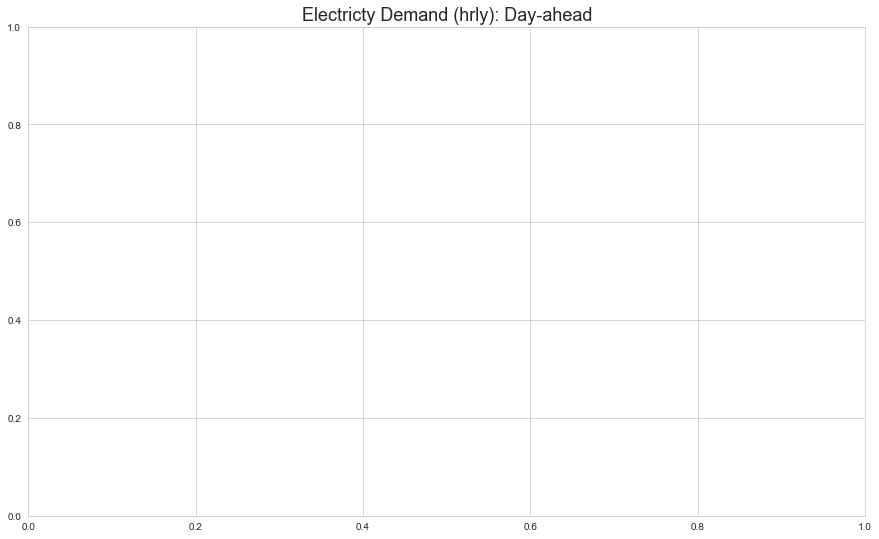

In [77]:
plt.figure(figsize=(15,9))
plt.title('Electricty Demand (hrly): Day-ahead', fontsize=18)

In [78]:
# plt.plot(elec_demand_hrly.index,
# elec_demand_hrly['7da_load_fcast_mw'],
# label = '7 DA', alpha=0.5)
# plt.plot(elec_demand_hrly.index,
# elec_demand_hrly['2da_load_fcast_mw'],
# label= '2 DA', alpha=0.2)

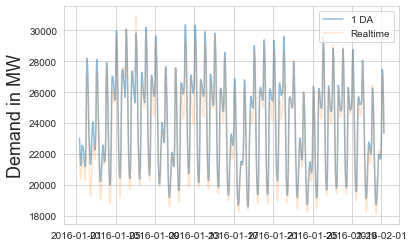

In [79]:
plt.plot(elec_demand_hrly.index, elec_demand_hrly['dam_load_fcast_mw'], label = '1 DA', alpha=0.5)
plt.plot(elec_demand_hrly.index,elec_demand_hrly['rtm_load_fcast_mw'],label = 'Realtime', alpha=0.2)
plt.ylabel('Demand in MW', fontsize=18)
plt.legend()
# plt.savefig('raw_data3/images/elec_demand_hrly.jpg', bbox_inches='tight')
plt.show();

In [80]:
# *** End of 2b_Electricity_Demand_Fcast_Dataframe

In [81]:
#Page 48

In [82]:
# **** Start Water_Levels_Dataframe


In [83]:
# Reservoir Storage DataFrame Columns
res_strg_orig_cols=['DATE TIME','STATION_ID','VALUE']
res_strg_new_cols =['datetime','reservoir_id','water_acre_feet']
res_strg_rename_dict = {old: new for old, new in zip(res_strg_orig_cols,res_strg_new_cols)}
# Loop Through Files & Append Data
res_strg_df = pd.DataFrame(columns=res_strg_new_cols)
for file in glob.glob(r'C:\Users\Hope\Documents\Final Project\ca_dwr_dl/*.csv'):
    df = pd.read_csv(file, usecols=res_strg_orig_cols).rename(index=str,columns=res_strg_rename_dict)
    res_strg_df = res_strg_df.append(df, ignore_index=True, sort=True)
res_strg_df = res_strg_df.sort_values(by='datetime').reset_index(drop=True)
res_strg_df['datetime'] = pd.to_datetime(res_strg_df['datetime'])
res_strg_df.set_index('datetime', inplace=True)
res_strg_df.sort_index(inplace=True)
res_strg_df.head()

,reservoir_id,water_acre_feet
datetime,,
2016-01-01,ANT,17222
2016-01-01,UNV,148814
2016-01-01,FOL,239069
2016-01-01,PNF,150598
2016-01-01,CAS,---


In [84]:
res_strg_df = res_strg_df.tz_localize('America/Los_Angeles',ambiguous=False)
res_strg_df.tail()

,reservoir_id,water_acre_feet
datetime,,
2019-05-07 00:00:00-07:00,ENG,71849
2019-05-07 00:00:00-07:00,PAR,---
2019-05-07 00:00:00-07:00,EXC,833288
2019-05-07 00:00:00-07:00,CMN,---
2019-05-07 00:00:00-07:00,WRS,245200


In [85]:
print(res_strg_df.shape)


(1080658, 2)


In [86]:
res_strg_df.isna().sum()

reservoir_id       0
water_acre_feet    0
dtype: int64

In [87]:
res_strg_df.replace('---', np.nan, inplace=True)
res_strg_df.replace('ART', np.nan, inplace=True)
res_strg_df.replace('BRT', np.nan, inplace=True)
res_strg_df.isna().sum()

reservoir_id           0
water_acre_feet    35983
dtype: int64

In [88]:
res_strg_df.water_acre_feet.fillna(method='ffill', inplace=True)
res_strg_df.isna().sum()

reservoir_id       0
water_acre_feet    0
dtype: int64

In [89]:
res_strg_df.dtypes

reservoir_id       object
water_acre_feet    object
dtype: object

In [90]:
res_strg_df.water_acre_feet = res_strg_df.water_acre_feet.astype(int)
res_strg_df.dtypes


reservoir_id       object
water_acre_feet     int32
dtype: object

In [91]:
ca_water_levels = pd.DataFrame(res_strg_df.groupby('datetime')['water_acre_feet'].sum())
ca_water_levels.head()

,water_acre_feet
datetime,
2016-01-01 00:00:00-08:00,6307203
2016-01-01 01:00:00-08:00,6542329
2016-01-01 02:00:00-08:00,6761167
2016-01-01 03:00:00-08:00,6557313
2016-01-01 04:00:00-08:00,6530157


In [92]:
ca_water_levels.shape

(29325, 1)

In [93]:
ca_water_levels.tail()

,water_acre_feet
datetime,
2019-05-06 20:00:00-07:00,22324833
2019-05-06 21:00:00-07:00,22346208
2019-05-06 22:00:00-07:00,23090106
2019-05-06 23:00:00-07:00,24025586
2019-05-07 00:00:00-07:00,22676194


In [94]:
'''# Export to .csv File
res_strg_df.to_csv('raw_data3/data/water_levels_by_reservoir.csv')
ca_water_levels.to_csv('raw_data3/data/ca_water_levels.csv')'''

"# Export to .csv File\nres_strg_df.to_csv('raw_data3/data/water_levels_by_reservoir.csv')\nca_water_levels.to_csv('raw_data3/data/ca_water_levels.csv')"

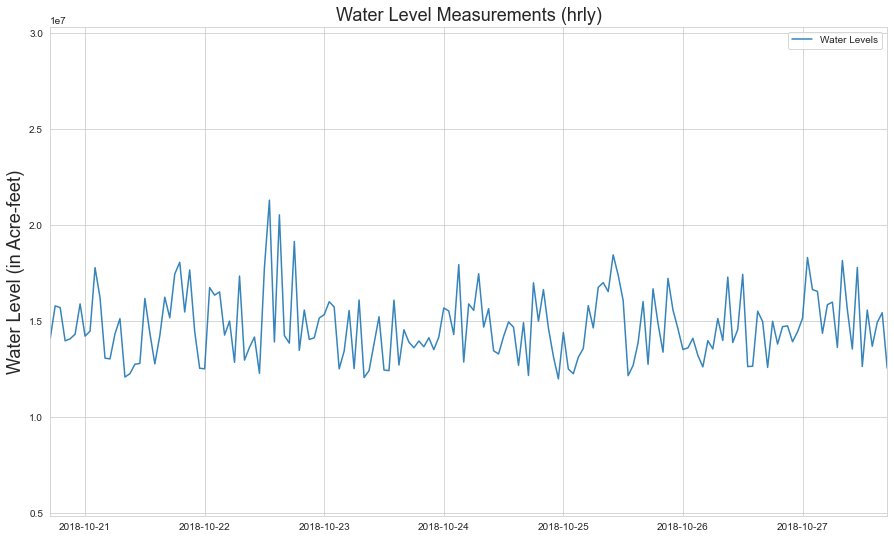

In [95]:
# Plot Water Levels Over Time
plt.figure(figsize=(15,9))
plt.title('Water Level Measurements (hrly)', fontsize=18)
plt.plot(ca_water_levels.index,ca_water_levels.water_acre_feet,label = 'Water Levels',alpha = 0.9)
plt.xlim('2018-10-21', '2018-10-28')
plt.ylabel('Water Level (in Acre-feet)', fontsize=18)
plt.legend()
# plt.savefig('raw_data3/images/ca_wtr_lev_1wk_oct18.jpg', bbox_inches='tight')
plt.show();


In [96]:
# **** End of 2c_Water_Levels_Dataframe

In [97]:
# *** Start of NOAA_Four_CA_Weather_Stn_Dataframes

In [98]:
#page 52

In [99]:
#Skipped, Because of lac of data

In [100]:
# *** Start Electricity_Prices_(5min)_Dataframe

In [101]:
#Page 64

In [102]:
# Day-Ahead-Market DataFrame
dam_orig_cols=['INTERVALSTARTTIME_GMT', 'OPR_DT', 'OPR_HR', 'NODE', 'MARKET_RUN_ID', 'LMP_TYPE', 'MW']
dam_new_cols =['start_datetime', 'date', 'hr_index', 'node', 'market', 'lmp_type', 'dam_price_per_mwh']
dam_rename_dict = {old: new for old, new in zip(dam_orig_cols, dam_new_cols)}
caiso_dam_df = pd.DataFrame(columns=dam_new_cols)
for file in glob.glob(r'C:\Users\Hope\Documents\Final Project\unzipped_caiso/unzipped_caiso_dam/*.csv'):
    df = pd.read_csv(file, usecols=dam_orig_cols).rename(index=str,columns=dam_rename_dict)
    df = df[df.lmp_type == 'LMP']
    caiso_dam_df = caiso_dam_df.append(df, ignore_index=True)
caiso_dam_df.shape


(1486, 7)

In [103]:
caiso_dam_df = caiso_dam_df.sort_values(by='start_datetime').reset_index(drop=True)
caiso_dam_df['start_datetime'] = pd.to_datetime(caiso_dam_df['start_datetime'])
caiso_dam_df.set_index('start_datetime', inplace=True)
caiso_dam_df.sort_index(inplace=True)
caiso_dam_df.head()


,date,hr_index,node,market,lmp_type,dam_price_per_mwh
start_datetime,,,,,,
2016-01-01 08:00:00+00:00,2016-01-01,1,BAYSHOR2_1_N001,DAM,LMP,31.69690
2016-01-01 09:00:00+00:00,2016-01-01,2,BAYSHOR2_1_N001,DAM,LMP,30.38613
2016-01-01 10:00:00+00:00,2016-01-01,3,BAYSHOR2_1_N001,DAM,LMP,30.29141
2016-01-01 11:00:00+00:00,2016-01-01,4,BAYSHOR2_1_N001,DAM,LMP,28.45127
2016-01-01 12:00:00+00:00,2016-01-01,5,BAYSHOR2_1_N001,DAM,LMP,28.66504


In [104]:
caiso_dam_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1486 entries, 2016-01-01 08:00:00+00:00 to 2016-06-01 06:00:00+00:00
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   date               1486 non-null   object 
 1   hr_index           1486 non-null   object 
 2   node               1486 non-null   object 
 3   market             1486 non-null   object 
 4   lmp_type           1486 non-null   object 
 5   dam_price_per_mwh  1486 non-null   float64
dtypes: float64(1), object(5)
memory usage: 81.3+ KB


In [105]:
# Hour-Ahead-Scheduling Process DataFrame (hour-ahead, 15-minute realtime market)
hasp_orig_cols=['INTERVALSTARTTIME_GMT', 'OPR_DT', 'OPR_HR', 'NODE', 'MARKET_RUN_ID', 'LMP_TYPE', 'MW']
hasp_new_cols =['start_datetime', 'date', 'hr_index', 'node', 'market', 'lmp_type', 'hasp_price_per_mwh']
hasp_rename_dict = {old: new for old, new in zip(hasp_orig_cols, hasp_new_cols)}
caiso_hasp_df = pd.DataFrame(columns=hasp_new_cols)
for file in glob.glob(r'C:\Users\Hope\Documents\Final Project\unzipped_caiso/unzipped_caiso_hasp/*.csv'):
    df = pd.read_csv(file, usecols=hasp_orig_cols).rename(index=str,
    columns=hasp_rename_dict)
    df = df[df.lmp_type == 'LMP']
    caiso_hasp_df = caiso_hasp_df.append(df, ignore_index=True)
caiso_hasp_df.shape

(5924, 7)

In [106]:
caiso_hasp_df = caiso_hasp_df.sort_values(by='start_datetime').reset_index(drop=True)
caiso_hasp_df['start_datetime'] = pd.to_datetime(caiso_hasp_df['start_datetime'])
caiso_hasp_df.set_index('start_datetime', inplace=True)
caiso_hasp_df.sort_index(inplace=True)
caiso_hasp_df.head()

,date,hr_index,node,market,lmp_type,hasp_price_per_mwh
start_datetime,,,,,,
2016-01-01 08:00:00+00:00,2016-01-01,1,BAYSHOR2_1_N001,HASP,LMP,25.71969
2016-01-01 08:15:00+00:00,2016-01-01,1,BAYSHOR2_1_N001,HASP,LMP,24.54000
2016-01-01 08:30:00+00:00,2016-01-01,1,BAYSHOR2_1_N001,HASP,LMP,24.53352
2016-01-01 08:45:00+00:00,2016-01-01,1,BAYSHOR2_1_N001,HASP,LMP,24.15808
2016-01-01 09:00:00+00:00,2016-01-01,2,BAYSHOR2_1_N001,HASP,LMP,25.32248


In [107]:
caiso_hasp_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5924 entries, 2016-01-01 08:00:00+00:00 to 2016-06-01 06:45:00+00:00
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   date                5924 non-null   object 
 1   hr_index            5924 non-null   object 
 2   node                5924 non-null   object 
 3   market              5924 non-null   object 
 4   lmp_type            5924 non-null   object 
 5   hasp_price_per_mwh  5924 non-null   float64
dtypes: float64(1), object(5)
memory usage: 324.0+ KB


In [108]:
# RTM DataFrame (realtime spot prices, 5-minute realtime settlements only)
rtm_orig_cols=['INTERVALSTARTTIME_GMT', 'OPR_DT', 'OPR_HR', 'NODE', 'MARKET_RUN_ID', 'LMP_TYPE', 'VALUE']
rtm_new_cols =['start_datetime', 'date', 'hr_index', 'node', 'market', 'lmp_type', 'rtm_price_per_mwh']
rtm_rename_dict = {old: new for old, new in zip(rtm_orig_cols, rtm_new_cols)}
caiso_rtm_df = pd.DataFrame(columns=rtm_new_cols)
for file in glob.glob(r'C:\Users\Hope\Documents\Final Project\unzipped_caiso/unzipped_caiso_rtm/*.csv'):
    df = pd.read_csv(file, usecols=rtm_orig_cols).rename(index=str,
    columns=rtm_rename_dict)
    df = df[df.lmp_type == 'LMP']
    caiso_rtm_df = caiso_rtm_df.append(df, ignore_index=True)
caiso_rtm_df.shape

(8916, 7)

In [109]:
caiso_rtm_df = caiso_rtm_df.sort_values(by='start_datetime').reset_index(drop=True)
caiso_rtm_df['start_datetime'] = pd.to_datetime(caiso_rtm_df['start_datetime'])
caiso_rtm_df.set_index('start_datetime', inplace=True)
caiso_rtm_df.sort_index(inplace=True)
caiso_rtm_df.head()

,date,hr_index,node,market,lmp_type,rtm_price_per_mwh
start_datetime,,,,,,
2016-01-01 08:00:00+00:00,2016-01-01,1,BAYSHOR2_1_N001,RTM,LMP,25.53958
2016-01-01 08:05:00+00:00,2016-01-01,1,BAYSHOR2_1_N001,RTM,LMP,25.24638
2016-01-01 08:10:00+00:00,2016-01-01,1,BAYSHOR2_1_N001,RTM,LMP,25.54549
2016-01-01 08:15:00+00:00,2016-01-01,1,BAYSHOR2_1_N001,RTM,LMP,25.23638
2016-01-01 08:20:00+00:00,2016-01-01,1,BAYSHOR2_1_N001,RTM,LMP,25.23638


In [110]:
caiso_rtm_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8916 entries, 2016-01-01 08:00:00+00:00 to 2016-02-01 06:55:00+00:00
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   date               8916 non-null   object 
 1   hr_index           8916 non-null   object 
 2   node               8916 non-null   object 
 3   market             8916 non-null   object 
 4   lmp_type           8916 non-null   object 
 5   rtm_price_per_mwh  8916 non-null   float64
dtypes: float64(1), object(5)
memory usage: 487.6+ KB


In [111]:
# Join DAM + HASP + RTM LMP's Into a Single DataFrame
elec_prices_5min = caiso_rtm_df.drop(columns=['market', 'lmp_type'])
elec_prices_5min.shape

(8916, 4)

In [112]:
elec_prices_5min.head()

,date,hr_index,node,rtm_price_per_mwh
start_datetime,,,,
2016-01-01 08:00:00+00:00,2016-01-01,1,BAYSHOR2_1_N001,25.53958
2016-01-01 08:05:00+00:00,2016-01-01,1,BAYSHOR2_1_N001,25.24638
2016-01-01 08:10:00+00:00,2016-01-01,1,BAYSHOR2_1_N001,25.54549
2016-01-01 08:15:00+00:00,2016-01-01,1,BAYSHOR2_1_N001,25.23638
2016-01-01 08:20:00+00:00,2016-01-01,1,BAYSHOR2_1_N001,25.23638


In [113]:
elec_prices_5min = elec_prices_5min.merge(caiso_hasp_df[['hasp_price_per_mwh']], how='outer', left_index = True, right_index = True)
elec_prices_5min.shape

(11880, 5)

In [114]:
elec_prices_5min.head()

,date,hr_index,node,rtm_price_per_mwh,hasp_price_per_mwh
start_datetime,,,,,
2016-01-01 08:00:00+00:00,2016-01-01,1,BAYSHOR2_1_N001,25.53958,25.71969
2016-01-01 08:05:00+00:00,2016-01-01,1,BAYSHOR2_1_N001,25.24638,NaN
2016-01-01 08:10:00+00:00,2016-01-01,1,BAYSHOR2_1_N001,25.54549,NaN
2016-01-01 08:15:00+00:00,2016-01-01,1,BAYSHOR2_1_N001,25.23638,24.54000
2016-01-01 08:20:00+00:00,2016-01-01,1,BAYSHOR2_1_N001,25.23638,NaN


In [115]:
elec_prices_5min = elec_prices_5min.merge(caiso_dam_df[['dam_price_per_mwh']], how='outer', left_index = True, right_index = True)
elec_prices_5min.shape

(11882, 6)

In [116]:
elec_prices_5min.head(15)
elec_prices_5min.isna().sum().sum()

28218

In [117]:
elec_prices_5min.fillna(method='ffill', inplace=True)
elec_prices_5min.isna().sum().sum()

0

In [118]:
print(elec_prices_5min.shape)

(11882, 6)


In [119]:
elec_prices_5min.head()

,date,hr_index,node,rtm_price_per_mwh,hasp_price_per_mwh,dam_price_per_mwh
start_datetime,,,,,,
2016-01-01 08:00:00+00:00,2016-01-01,1,BAYSHOR2_1_N001,25.53958,25.71969,31.6969
2016-01-01 08:05:00+00:00,2016-01-01,1,BAYSHOR2_1_N001,25.24638,25.71969,31.6969
2016-01-01 08:10:00+00:00,2016-01-01,1,BAYSHOR2_1_N001,25.54549,25.71969,31.6969
2016-01-01 08:15:00+00:00,2016-01-01,1,BAYSHOR2_1_N001,25.23638,24.54000,31.6969
2016-01-01 08:20:00+00:00,2016-01-01,1,BAYSHOR2_1_N001,25.23638,24.54000,31.6969


In [120]:
elec_prices_5min.tail()

,date,hr_index,node,rtm_price_per_mwh,hasp_price_per_mwh,dam_price_per_mwh
start_datetime,,,,,,
2016-06-01 05:45:00+00:00,2016-01-31,23,BAYSHOR2_1_N001,28.21215,22.19509,24.10295
2016-06-01 06:00:00+00:00,2016-01-31,23,BAYSHOR2_1_N001,28.21215,27.31991,21.10436
2016-06-01 06:15:00+00:00,2016-01-31,23,BAYSHOR2_1_N001,28.21215,24.30132,21.10436
2016-06-01 06:30:00+00:00,2016-01-31,23,BAYSHOR2_1_N001,28.21215,23.33694,21.10436
2016-06-01 06:45:00+00:00,2016-01-31,23,BAYSHOR2_1_N001,28.21215,19.14316,21.10436


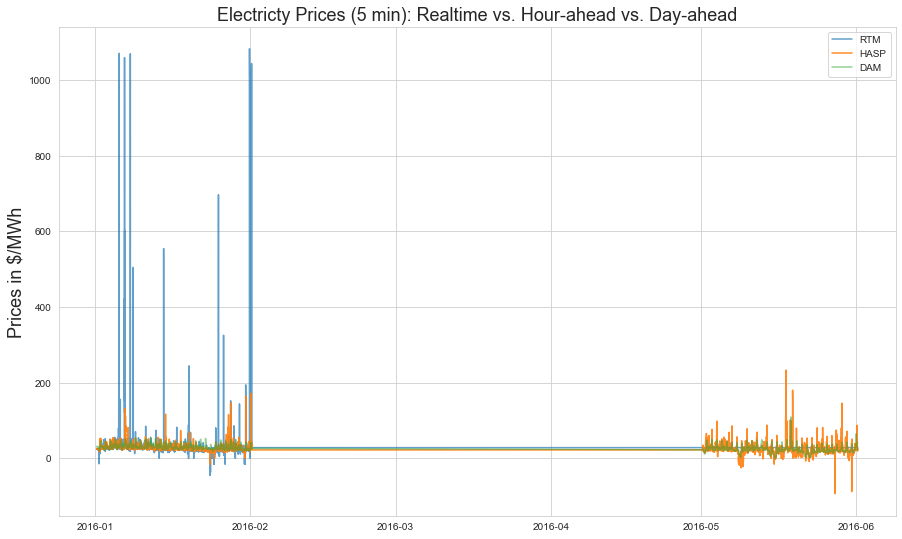

In [121]:
elec_prices_5min.to_csv(r'C:\Users\Hope\Documents\Final Project\data/elec_prices_5min.csv')
plt.figure(figsize=(15,9))
plt.title('Electricty Prices (5 min): Realtime vs. Hour-ahead vs. Day-ahead', fontsize=18)
plt.plot(elec_prices_5min.index, elec_prices_5min.rtm_price_per_mwh, label = 'RTM', alpha=0.7)
plt.plot(elec_prices_5min.index, elec_prices_5min.hasp_price_per_mwh, label= 'HASP', alpha=0.9)
plt.plot(elec_prices_5min.index, elec_prices_5min.dam_price_per_mwh, label = 'DAM', alpha=0.5)
plt.ylabel('Prices in $/MWh', fontsize=18)
plt.legend()
plt.show()
#plt.savefig('raw_data3/images/elec_prices_5min.jpg', bbox_inches='tight');

In [122]:
# *** End of 2x_Electricity_Prices_(5min)_Dataframe

In [126]:
# *** Start NOAA_Combined_CA_Weather_Dataframe-(4_stn)
#Page 73

In [127]:
def index_to_datetime(df):
    df['datetime'] = pd.to_datetime(df['datetime']).dt.round('H')
    df.set_index('datetime', inplace=True)
    df.sort_index(inplace=True)
    return df
def shapes_nulls():
    print(f'sand: {sand_df.shape[0]} rows, {sand_df.isna().sum().sum()} nulls')
    print(f'rive: {rive_df.shape[0]} rows, {rive_df.isna().sum().sum()} nulls')
    print(f'redd: {redd_df.shape[0]} rows, {redd_df.isna().sum().sum()} nulls')
    print(f'fres: {fres_df.shape[0]} rows, {fres_df.isna().sum().sum()} nulls')
    return

In [128]:
# Read in Four Individual Weather Station DataFrames
sand_df = pd.read_csv(r'C:\Users\Hope\Documents\Final Project\data/san_diego_weather2.csv')
rive_df = pd.read_csv(r'C:\Users\Hope\Documents\Final Project\data/riverside_weather2.csv')
redd_df = pd.read_csv(r'C:\Users\Hope\Documents\Final Project\data/redding_weather2.csv')
fres_df = pd.read_csv(r'C:\Users\Hope\Documents\Final Project\data/fresno_weather2.csv')

shapes_nulls()

sand: 24007 rows, 0 nulls
rive: 17142 rows, 0 nulls
redd: 22201 rows, 0 nulls
fres: 21711 rows, 0 nulls


In [129]:
sand_df = index_to_datetime(sand_df)
rive_df = index_to_datetime(rive_df)

In [130]:
redd_df = index_to_datetime(redd_df)
fres_df = index_to_datetime(fres_df)
sand_df.head()

,sand_temp,sand_wind,sand_vis,sand_ceil
datetime,,,,
2016-01-01 01:00:00,156,26,16093,22000
2016-01-01 02:00:00,144,21,16093,22000
2016-01-01 03:00:00,139,0,16093,22000
2016-01-01 04:00:00,133,0,16093,22000
2016-01-01 05:00:00,122,0,16093,22000


In [131]:
rive_df.head()

,rive_temp,rive_wind,rive_vis,rive_ceil
datetime,,,,
2016-01-01 01:00:00,133,51,16093,22000
2016-01-01 02:00:00,128,46,16093,22000
2016-01-01 03:00:00,122,46,16093,22000
2016-01-01 04:00:00,117,41,16093,22000
2016-01-01 05:00:00,111,51,16093,22000


In [132]:
redd_df.head()

,redd_temp,redd_wind,redd_vis,redd_ceil
datetime,,,,
2016-01-01 01:00:00,94,72,16093,22000
2016-01-01 02:00:00,83,93,16093,22000
2016-01-01 03:00:00,78,67,16093,22000
2016-01-01 04:00:00,67,72,16093,22000
2016-01-01 06:00:00,56,72,16093,22000


In [133]:
fres_df.head()

,fres_temp,fres_wind,fres_vis,fres_ceil
datetime,,,,
2016-01-01 01:00:00,100,0,11265,22000
2016-01-01 02:00:00,78,0,11265,22000
2016-01-01 03:00:00,67,0,9656,22000
2016-01-01 04:00:00,56,15,8047,22000
2016-01-01 05:00:00,39,0,6437,22000


In [134]:
# Join DataFrames
weather_df = sand_df
weather_df.shape

(24007, 4)

In [135]:
weather_df.head()
weather_df = weather_df.merge(fres_df, how='outer', left_index = True, right_index = True)
weather_df.head()

,sand_temp,sand_wind,sand_vis,sand_ceil,fres_temp,fres_wind,fres_vis,fres_ceil
datetime,,,,,,,,
2016-01-01 01:00:00,156.0,26.0,16093.0,22000.0,100.0,0.0,11265.0,22000.0
2016-01-01 02:00:00,144.0,21.0,16093.0,22000.0,78.0,0.0,11265.0,22000.0
2016-01-01 03:00:00,139.0,0.0,16093.0,22000.0,67.0,0.0,9656.0,22000.0
2016-01-01 04:00:00,133.0,0.0,16093.0,22000.0,56.0,15.0,8047.0,22000.0
2016-01-01 05:00:00,122.0,0.0,16093.0,22000.0,39.0,0.0,6437.0,22000.0


In [136]:
weather_df.shape

(33488, 8)

In [137]:
weather_df = weather_df.merge(rive_df, how='outer', left_index = True, right_index = True)
weather_df.shape


(39859, 12)

In [138]:
weather_df = weather_df.merge(redd_df, how='outer', left_index = True, right_index = True)
weather_df.head()

,sand_temp,sand_wind,sand_vis,sand_ceil,fres_temp,fres_wind,fres_vis,fres_ceil,rive_temp,rive_wind,rive_vis,rive_ceil,redd_temp,redd_wind,redd_vis,redd_ceil
datetime,,,,,,,,,,,,,,,,
2016-01-01 01:00:00,156.0,26.0,16093.0,22000.0,100.0,0.0,11265.0,22000.0,133.0,51.0,16093.0,22000.0,94.0,72.0,16093.0,22000.0
2016-01-01 02:00:00,144.0,21.0,16093.0,22000.0,78.0,0.0,11265.0,22000.0,128.0,46.0,16093.0,22000.0,83.0,93.0,16093.0,22000.0
2016-01-01 03:00:00,139.0,0.0,16093.0,22000.0,67.0,0.0,9656.0,22000.0,122.0,46.0,16093.0,22000.0,78.0,67.0,16093.0,22000.0
2016-01-01 04:00:00,133.0,0.0,16093.0,22000.0,56.0,15.0,8047.0,22000.0,117.0,41.0,16093.0,22000.0,67.0,72.0,16093.0,22000.0
2016-01-01 05:00:00,122.0,0.0,16093.0,22000.0,39.0,0.0,6437.0,22000.0,111.0,51.0,16093.0,22000.0,NaN,NaN,NaN,NaN


In [139]:
weather_df.drop_duplicates(inplace=True)
print(weather_df.shape)

(49932, 16)


In [140]:
weather_df.head()

,sand_temp,sand_wind,sand_vis,sand_ceil,fres_temp,fres_wind,fres_vis,fres_ceil,rive_temp,rive_wind,rive_vis,rive_ceil,redd_temp,redd_wind,redd_vis,redd_ceil
datetime,,,,,,,,,,,,,,,,
2016-01-01 01:00:00,156.0,26.0,16093.0,22000.0,100.0,0.0,11265.0,22000.0,133.0,51.0,16093.0,22000.0,94.0,72.0,16093.0,22000.0
2016-01-01 02:00:00,144.0,21.0,16093.0,22000.0,78.0,0.0,11265.0,22000.0,128.0,46.0,16093.0,22000.0,83.0,93.0,16093.0,22000.0
2016-01-01 03:00:00,139.0,0.0,16093.0,22000.0,67.0,0.0,9656.0,22000.0,122.0,46.0,16093.0,22000.0,78.0,67.0,16093.0,22000.0
2016-01-01 04:00:00,133.0,0.0,16093.0,22000.0,56.0,15.0,8047.0,22000.0,117.0,41.0,16093.0,22000.0,67.0,72.0,16093.0,22000.0
2016-01-01 05:00:00,122.0,0.0,16093.0,22000.0,39.0,0.0,6437.0,22000.0,111.0,51.0,16093.0,22000.0,NaN,NaN,NaN,NaN


In [141]:
weather_df = weather_df[~weather_df.index.duplicated(keep='first')]
print(weather_df.shape)

(26190, 16)


In [142]:
weather_df.head()

,sand_temp,sand_wind,sand_vis,sand_ceil,fres_temp,fres_wind,fres_vis,fres_ceil,rive_temp,rive_wind,rive_vis,rive_ceil,redd_temp,redd_wind,redd_vis,redd_ceil
datetime,,,,,,,,,,,,,,,,
2016-01-01 01:00:00,156.0,26.0,16093.0,22000.0,100.0,0.0,11265.0,22000.0,133.0,51.0,16093.0,22000.0,94.0,72.0,16093.0,22000.0
2016-01-01 02:00:00,144.0,21.0,16093.0,22000.0,78.0,0.0,11265.0,22000.0,128.0,46.0,16093.0,22000.0,83.0,93.0,16093.0,22000.0
2016-01-01 03:00:00,139.0,0.0,16093.0,22000.0,67.0,0.0,9656.0,22000.0,122.0,46.0,16093.0,22000.0,78.0,67.0,16093.0,22000.0
2016-01-01 04:00:00,133.0,0.0,16093.0,22000.0,56.0,15.0,8047.0,22000.0,117.0,41.0,16093.0,22000.0,67.0,72.0,16093.0,22000.0
2016-01-01 05:00:00,122.0,0.0,16093.0,22000.0,39.0,0.0,6437.0,22000.0,111.0,51.0,16093.0,22000.0,NaN,NaN,NaN,NaN


In [143]:
datetime_index = pd.date_range(start = '2016-01-01 01:00', end = '2019-04-24 07:00', freq = 'H')
len(datetime_index)

29023

In [144]:
weather_df.head()


,sand_temp,sand_wind,sand_vis,sand_ceil,fres_temp,fres_wind,fres_vis,fres_ceil,rive_temp,rive_wind,rive_vis,rive_ceil,redd_temp,redd_wind,redd_vis,redd_ceil
datetime,,,,,,,,,,,,,,,,
2016-01-01 01:00:00,156.0,26.0,16093.0,22000.0,100.0,0.0,11265.0,22000.0,133.0,51.0,16093.0,22000.0,94.0,72.0,16093.0,22000.0
2016-01-01 02:00:00,144.0,21.0,16093.0,22000.0,78.0,0.0,11265.0,22000.0,128.0,46.0,16093.0,22000.0,83.0,93.0,16093.0,22000.0
2016-01-01 03:00:00,139.0,0.0,16093.0,22000.0,67.0,0.0,9656.0,22000.0,122.0,46.0,16093.0,22000.0,78.0,67.0,16093.0,22000.0
2016-01-01 04:00:00,133.0,0.0,16093.0,22000.0,56.0,15.0,8047.0,22000.0,117.0,41.0,16093.0,22000.0,67.0,72.0,16093.0,22000.0
2016-01-01 05:00:00,122.0,0.0,16093.0,22000.0,39.0,0.0,6437.0,22000.0,111.0,51.0,16093.0,22000.0,NaN,NaN,NaN,NaN


In [145]:
weather_df = weather_df.reindex(datetime_index)
weather_df.head()

,sand_temp,sand_wind,sand_vis,sand_ceil,fres_temp,fres_wind,fres_vis,fres_ceil,rive_temp,rive_wind,rive_vis,rive_ceil,redd_temp,redd_wind,redd_vis,redd_ceil
2016-01-01 01:00:00,156.0,26.0,16093.0,22000.0,100.0,0.0,11265.0,22000.0,133.0,51.0,16093.0,22000.0,94.0,72.0,16093.0,22000.0
2016-01-01 02:00:00,144.0,21.0,16093.0,22000.0,78.0,0.0,11265.0,22000.0,128.0,46.0,16093.0,22000.0,83.0,93.0,16093.0,22000.0
2016-01-01 03:00:00,139.0,0.0,16093.0,22000.0,67.0,0.0,9656.0,22000.0,122.0,46.0,16093.0,22000.0,78.0,67.0,16093.0,22000.0
2016-01-01 04:00:00,133.0,0.0,16093.0,22000.0,56.0,15.0,8047.0,22000.0,117.0,41.0,16093.0,22000.0,67.0,72.0,16093.0,22000.0
2016-01-01 05:00:00,122.0,0.0,16093.0,22000.0,39.0,0.0,6437.0,22000.0,111.0,51.0,16093.0,22000.0,NaN,NaN,NaN,NaN


In [146]:
weather_df.fillna(method='ffill', inplace=True)
weather_df = weather_df.tz_localize('America/Los_Angeles', ambiguous=True, nonexistent='shift_forward')
weather_df.isna().sum().sum()

0

In [147]:
print(weather_df.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 29023 entries, 2016-01-01 01:00:00-08:00 to 2019-04-24 07:00:00-07:00
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sand_temp  29023 non-null  float64
 1   sand_wind  29023 non-null  float64
 2   sand_vis   29023 non-null  float64
 3   sand_ceil  29023 non-null  float64
 4   fres_temp  29023 non-null  float64
 5   fres_wind  29023 non-null  float64
 6   fres_vis   29023 non-null  float64
 7   fres_ceil  29023 non-null  float64
 8   rive_temp  29023 non-null  float64
 9   rive_wind  29023 non-null  float64
 10  rive_vis   29023 non-null  float64
 11  rive_ceil  29023 non-null  float64
 12  redd_temp  29023 non-null  float64
 13  redd_wind  29023 non-null  float64
 14  redd_vis   29023 non-null  float64
 15  redd_ceil  29023 non-null  float64
dtypes: float64(16)
memory usage: 3.8 MB
None


In [148]:
weather_df = weather_df.astype(int)
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 29023 entries, 2016-01-01 01:00:00-08:00 to 2019-04-24 07:00:00-07:00
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   sand_temp  29023 non-null  int32
 1   sand_wind  29023 non-null  int32
 2   sand_vis   29023 non-null  int32
 3   sand_ceil  29023 non-null  int32
 4   fres_temp  29023 non-null  int32
 5   fres_wind  29023 non-null  int32
 6   fres_vis   29023 non-null  int32
 7   fres_ceil  29023 non-null  int32
 8   rive_temp  29023 non-null  int32
 9   rive_wind  29023 non-null  int32
 10  rive_vis   29023 non-null  int32
 11  rive_ceil  29023 non-null  int32
 12  redd_temp  29023 non-null  int32
 13  redd_wind  29023 non-null  int32
 14  redd_vis   29023 non-null  int32
 15  redd_ceil  29023 non-null  int32
dtypes: int32(16)
memory usage: 2.0 MB


In [149]:
weather_df.shape

(29023, 16)

In [150]:
weather_df.head()

,sand_temp,sand_wind,sand_vis,sand_ceil,fres_temp,fres_wind,fres_vis,fres_ceil,rive_temp,rive_wind,rive_vis,rive_ceil,redd_temp,redd_wind,redd_vis,redd_ceil
2016-01-01 01:00:00-08:00,156,26,16093,22000,100,0,11265,22000,133,51,16093,22000,94,72,16093,22000
2016-01-01 02:00:00-08:00,144,21,16093,22000,78,0,11265,22000,128,46,16093,22000,83,93,16093,22000
2016-01-01 03:00:00-08:00,139,0,16093,22000,67,0,9656,22000,122,46,16093,22000,78,67,16093,22000
2016-01-01 04:00:00-08:00,133,0,16093,22000,56,15,8047,22000,117,41,16093,22000,67,72,16093,22000
2016-01-01 05:00:00-08:00,122,0,16093,22000,39,0,6437,22000,111,51,16093,22000,67,72,16093,22000


In [151]:
# *** End of 3a_NOAA_Combined_CA_Weather_Dataframe-(4_stn)

In [152]:
# *** Start Fully_Consolidated_Dataframe


In [153]:
#Page_80

In [165]:
import wget, os
import time
import glob
import pytz
import pickle
def index_to_datetime(df):
    df['datetime'] = pd.to_datetime(df['datetime'], utc=True).dt.round('H')
    df.set_index('datetime', inplace=True)
    df.sort_index(inplace=True)
    return df
def shapes_nulls():
    print(f'Elec Prices: {elec_prices_df.shape[0]} rows, {elec_prices_df.isna().sum().sum()} nulls')
    print(f'Elec Dem Fcasts: {load_fcasts_df.shape[0]} rows, {load_fcasts_df.isna().sum().sum()} nulls')
    print(f'CA Water Levels: {water_levels_df.shape[0]} rows, {water_levels_df.isna().sum().sum()} nulls')
    print(f'CA Weather Data: {weather_df.shape[0]} rows, {weather_df.isna().sum().sum()} nulls')
    return


In [166]:
# Read in Four Sub- DataFrames
elec_prices_df = pd.read_csv(r'C:\Users\Hope\Documents\Final Project\data/elec_prices_hrly.csv')
load_fcasts_df = pd.read_csv(r'C:\Users\Hope\Documents\Final Project\data/elec_demand_hrly.csv')
water_levels_df = pd.read_csv(r'C:\Users\Hope\Documents\Final Project\data/ca_water_levels.csv')
weather_df = pd.read_csv(r'C:\Users\Hope\Documents\Final Project\data/ca_weather.csv')
shapes_nulls()

Elec Prices: 1481 rows, 0 nulls
Elec Dem Fcasts: 743 rows, 0 nulls
CA Water Levels: 29325 rows, 0 nulls
CA Weather Data: 29023 rows, 0 nulls


In [167]:
# Set Datetime Indices
# pytz.all_timezones
elec_prices_df.rename(columns={'start_datetime': 'datetime'}, inplace=True)
elec_prices_df = index_to_datetime(elec_prices_df)
elec_prices_df = elec_prices_df.tz_convert('America/Los_Angeles')
load_fcasts_df.rename(columns={'start_datetime': 'datetime'}, inplace=True)
load_fcasts_df = index_to_datetime(load_fcasts_df)
load_fcasts_df = load_fcasts_df.tz_convert('America/Los_Angeles')

In [168]:
water_levels_df = index_to_datetime(water_levels_df)
water_levels_df = water_levels_df.tz_convert('America/Los_Angeles')
weather_df.rename(columns={'Unnamed: 0': 'datetime'}, inplace=True)
weather_df = index_to_datetime(weather_df)
weather_df = weather_df.tz_convert('America/Los_Angeles')
elec_prices_df.head()

,date,hr_index,node,dam_price_per_mwh,hasp_price_per_mwh,rtm_price_per_mwh
datetime,,,,,,
2016-01-01 00:00:00-08:00,2016-01-01,1,BAYSHOR2_1_N001,31.69690,24.737823,25.53958
2016-01-01 01:00:00-08:00,2016-01-01,2,BAYSHOR2_1_N001,30.38613,25.030977,25.79172
2016-01-01 02:00:00-08:00,2016-01-01,3,BAYSHOR2_1_N001,30.29141,24.563878,24.55509
2016-01-01 03:00:00-08:00,2016-01-01,4,BAYSHOR2_1_N001,28.45127,24.775715,24.69287
2016-01-01 04:00:00-08:00,2016-01-01,5,BAYSHOR2_1_N001,28.66504,24.923320,22.28447


In [169]:
load_fcasts_df.head()

,date,hr_index,7da_load_fcast_mw,2da_load_fcast_mw,dam_load_fcast_mw,rtm_load_fcast_mw
datetime,,,,,,
2016-01-01 00:00:00-08:00,2016-01-01,1,22232.26,22872.01,23018.64,22179.0000
2016-01-01 01:00:00-08:00,2016-01-01,2,21515.00,22070.77,22188.26,21331.6250
2016-01-01 02:00:00-08:00,2016-01-01,3,20854.85,21419.40,21581.45,20648.3125
2016-01-01 03:00:00-08:00,2016-01-01,4,20495.68,20997.22,21261.00,20389.0000
2016-01-01 04:00:00-08:00,2016-01-01,5,20490.69,21008.41,21289.56,20443.8125


In [170]:
water_levels_df.head()

,water_acre_feet
datetime,
2016-01-01 00:00:00-08:00,6307203
2016-01-01 01:00:00-08:00,6542329
2016-01-01 02:00:00-08:00,6761167
2016-01-01 03:00:00-08:00,6557313
2016-01-01 04:00:00-08:00,6530157


In [171]:
weather_df.head()


,sand_temp,sand_wind,sand_vis,sand_ceil,fres_temp,fres_wind,fres_vis,fres_ceil,rive_temp,rive_wind,rive_vis,rive_ceil,redd_temp,redd_wind,redd_vis,redd_ceil
datetime,,,,,,,,,,,,,,,,
2016-01-01 01:00:00-08:00,156,26,16093,22000,100,0,11265,22000,133,51,16093,22000,94,72,16093,22000
2016-01-01 02:00:00-08:00,144,21,16093,22000,78,0,11265,22000,128,46,16093,22000,83,93,16093,22000
2016-01-01 03:00:00-08:00,139,0,16093,22000,67,0,9656,22000,122,46,16093,22000,78,67,16093,22000
2016-01-01 04:00:00-08:00,133,0,16093,22000,56,15,8047,22000,117,41,16093,22000,67,72,16093,22000
2016-01-01 05:00:00-08:00,122,0,16093,22000,39,0,6437,22000,111,51,16093,22000,67,72,16093,22000


In [172]:
# Join DataFrames

In [173]:
df = elec_prices_df
df.shape

(1481, 6)

In [174]:
df = df.merge(load_fcasts_df[['7da_load_fcast_mw', '2da_load_fcast_mw', 'dam_load_fcast_mw', 'rtm_load_fcast_mw']], how='left', left_index = True, right_index = True)
df.shape

(1481, 10)

In [175]:
df = df.merge(water_levels_df, how='left', left_index = True, right_index = True)
df.shape

(1481, 11)

In [176]:
df = df.merge(weather_df, how='left', left_index = True, right_index = True)
df.shape

(1481, 27)

In [177]:
df.drop_duplicates(inplace=True)
df.shape

(1481, 27)

In [178]:
df = df[~df.index.duplicated(keep='first')]
df.shape

(1481, 27)

In [179]:
df.head()

,date,hr_index,node,dam_price_per_mwh,hasp_price_per_mwh,rtm_price_per_mwh,7da_load_fcast_mw,2da_load_fcast_mw,dam_load_fcast_mw,rtm_load_fcast_mw,...,fres_vis,fres_ceil,rive_temp,rive_wind,rive_vis,rive_ceil,redd_temp,redd_wind,redd_vis,redd_ceil
datetime,,,,,,,,,,,,,,,,,,,,,
2016-01-01 00:00:00-08:00,2016-01-01,1,BAYSHOR2_1_N001,31.69690,24.737823,25.53958,22232.26,22872.01,23018.64,22179.0000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-01 01:00:00-08:00,2016-01-01,2,BAYSHOR2_1_N001,30.38613,25.030977,25.79172,21515.00,22070.77,22188.26,21331.6250,...,11265.0,22000.0,133.0,51.0,16093.0,22000.0,94.0,72.0,16093.0,22000.0
2016-01-01 02:00:00-08:00,2016-01-01,3,BAYSHOR2_1_N001,30.29141,24.563878,24.55509,20854.85,21419.40,21581.45,20648.3125,...,11265.0,22000.0,128.0,46.0,16093.0,22000.0,83.0,93.0,16093.0,22000.0
2016-01-01 03:00:00-08:00,2016-01-01,4,BAYSHOR2_1_N001,28.45127,24.775715,24.69287,20495.68,20997.22,21261.00,20389.0000,...,9656.0,22000.0,122.0,46.0,16093.0,22000.0,78.0,67.0,16093.0,22000.0
2016-01-01 04:00:00-08:00,2016-01-01,5,BAYSHOR2_1_N001,28.66504,24.923320,22.28447,20490.69,21008.41,21289.56,20443.8125,...,8047.0,22000.0,117.0,41.0,16093.0,22000.0,67.0,72.0,16093.0,22000.0


In [180]:
print(df.shape)

(1481, 27)


In [181]:
df.head()

,date,hr_index,node,dam_price_per_mwh,hasp_price_per_mwh,rtm_price_per_mwh,7da_load_fcast_mw,2da_load_fcast_mw,dam_load_fcast_mw,rtm_load_fcast_mw,...,fres_vis,fres_ceil,rive_temp,rive_wind,rive_vis,rive_ceil,redd_temp,redd_wind,redd_vis,redd_ceil
datetime,,,,,,,,,,,,,,,,,,,,,
2016-01-01 00:00:00-08:00,2016-01-01,1,BAYSHOR2_1_N001,31.69690,24.737823,25.53958,22232.26,22872.01,23018.64,22179.0000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-01 01:00:00-08:00,2016-01-01,2,BAYSHOR2_1_N001,30.38613,25.030977,25.79172,21515.00,22070.77,22188.26,21331.6250,...,11265.0,22000.0,133.0,51.0,16093.0,22000.0,94.0,72.0,16093.0,22000.0
2016-01-01 02:00:00-08:00,2016-01-01,3,BAYSHOR2_1_N001,30.29141,24.563878,24.55509,20854.85,21419.40,21581.45,20648.3125,...,11265.0,22000.0,128.0,46.0,16093.0,22000.0,83.0,93.0,16093.0,22000.0
2016-01-01 03:00:00-08:00,2016-01-01,4,BAYSHOR2_1_N001,28.45127,24.775715,24.69287,20495.68,20997.22,21261.00,20389.0000,...,9656.0,22000.0,122.0,46.0,16093.0,22000.0,78.0,67.0,16093.0,22000.0
2016-01-01 04:00:00-08:00,2016-01-01,5,BAYSHOR2_1_N001,28.66504,24.923320,22.28447,20490.69,21008.41,21289.56,20443.8125,...,8047.0,22000.0,117.0,41.0,16093.0,22000.0,67.0,72.0,16093.0,22000.0


In [182]:
# *** End of 3b_Fully_Consolidated_Dataframe

In [183]:
# **** Start of Pre-processing_for_Continuous_Targets


In [193]:
def summarize(df):
    print(f'{df.shape[0]} rows, {df.isna().sum().sum()} nulls')
    print(f'\n {df.head(3)}')
    return
# Read in Consolidated Data & Examine
#'''with open(r'C:\Users\Hope\Documents\Final Project\data\consolidated_data.pkl', 'rb') as f:
   # df = pickle.load(f)'''
df.head()

,date,hr_index,node,dam_price_per_mwh,hasp_price_per_mwh,rtm_price_per_mwh,7da_load_fcast_mw,2da_load_fcast_mw,dam_load_fcast_mw,rtm_load_fcast_mw,...,fres_vis,fres_ceil,rive_temp,rive_wind,rive_vis,rive_ceil,redd_temp,redd_wind,redd_vis,redd_ceil
datetime,,,,,,,,,,,,,,,,,,,,,
2016-01-01 00:00:00-08:00,2016-01-01,1,BAYSHOR2_1_N001,31.69690,24.737823,25.53958,22232.26,22872.01,23018.64,22179.0000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-01 01:00:00-08:00,2016-01-01,2,BAYSHOR2_1_N001,30.38613,25.030977,25.79172,21515.00,22070.77,22188.26,21331.6250,...,11265.0,22000.0,133.0,51.0,16093.0,22000.0,94.0,72.0,16093.0,22000.0
2016-01-01 02:00:00-08:00,2016-01-01,3,BAYSHOR2_1_N001,30.29141,24.563878,24.55509,20854.85,21419.40,21581.45,20648.3125,...,11265.0,22000.0,128.0,46.0,16093.0,22000.0,83.0,93.0,16093.0,22000.0
2016-01-01 03:00:00-08:00,2016-01-01,4,BAYSHOR2_1_N001,28.45127,24.775715,24.69287,20495.68,20997.22,21261.00,20389.0000,...,9656.0,22000.0,122.0,46.0,16093.0,22000.0,78.0,67.0,16093.0,22000.0
2016-01-01 04:00:00-08:00,2016-01-01,5,BAYSHOR2_1_N001,28.66504,24.923320,22.28447,20490.69,21008.41,21289.56,20443.8125,...,8047.0,22000.0,117.0,41.0,16093.0,22000.0,67.0,72.0,16093.0,22000.0


In [194]:
summarize(df)

1481 rows, 2980 nulls

                                  date  hr_index             node  \
datetime                                                           
2016-01-01 00:00:00-08:00  2016-01-01         1  BAYSHOR2_1_N001   
2016-01-01 01:00:00-08:00  2016-01-01         2  BAYSHOR2_1_N001   
2016-01-01 02:00:00-08:00  2016-01-01         3  BAYSHOR2_1_N001   

                           dam_price_per_mwh  hasp_price_per_mwh  \
datetime                                                           
2016-01-01 00:00:00-08:00           31.69690           24.737823   
2016-01-01 01:00:00-08:00           30.38613           25.030977   
2016-01-01 02:00:00-08:00           30.29141           24.563878   

                           rtm_price_per_mwh  7da_load_fcast_mw  \
datetime                                                          
2016-01-01 00:00:00-08:00           25.53958           22232.26   
2016-01-01 01:00:00-08:00           25.79172           21515.00   
2016-01-01 02:00:00-08:00 

In [195]:
# Add year, month, day, and hour Columns
# (drop the node, date, and hr columns
df.drop(columns=['node', 'date', 'hr_index'], inplace=True)
df.head(3)

,dam_price_per_mwh,hasp_price_per_mwh,rtm_price_per_mwh,7da_load_fcast_mw,2da_load_fcast_mw,dam_load_fcast_mw,rtm_load_fcast_mw,water_acre_feet,sand_temp,sand_wind,...,fres_vis,fres_ceil,rive_temp,rive_wind,rive_vis,rive_ceil,redd_temp,redd_wind,redd_vis,redd_ceil
datetime,,,,,,,,,,,,,,,,,,,,,
2016-01-01 00:00:00-08:00,31.69690,24.737823,25.53958,22232.26,22872.01,23018.64,22179.0000,6307203,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-01 01:00:00-08:00,30.38613,25.030977,25.79172,21515.00,22070.77,22188.26,21331.6250,6542329,156.0,26.0,...,11265.0,22000.0,133.0,51.0,16093.0,22000.0,94.0,72.0,16093.0,22000.0
2016-01-01 02:00:00-08:00,30.29141,24.563878,24.55509,20854.85,21419.40,21581.45,20648.3125,6761167,144.0,21.0,...,11265.0,22000.0,128.0,46.0,16093.0,22000.0,83.0,93.0,16093.0,22000.0


In [196]:
df['year'] = df.index.year
df['month'] = df.index.month
df['day'] = df.index.day
df['hour'] = df.index.hour
df.head(3)

,dam_price_per_mwh,hasp_price_per_mwh,rtm_price_per_mwh,7da_load_fcast_mw,2da_load_fcast_mw,dam_load_fcast_mw,rtm_load_fcast_mw,water_acre_feet,sand_temp,sand_wind,...,rive_vis,rive_ceil,redd_temp,redd_wind,redd_vis,redd_ceil,year,month,day,hour
datetime,,,,,,,,,,,,,,,,,,,,,
2016-01-01 00:00:00-08:00,31.69690,24.737823,25.53958,22232.26,22872.01,23018.64,22179.0000,6307203,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2016,1,1,0
2016-01-01 01:00:00-08:00,30.38613,25.030977,25.79172,21515.00,22070.77,22188.26,21331.6250,6542329,156.0,26.0,...,16093.0,22000.0,94.0,72.0,16093.0,22000.0,2016,1,1,1
2016-01-01 02:00:00-08:00,30.29141,24.563878,24.55509,20854.85,21419.40,21581.45,20648.3125,6761167,144.0,21.0,...,16093.0,22000.0,83.0,93.0,16093.0,22000.0,2016,1,1,2


In [197]:
df.shape

(1481, 28)

In [198]:
df.to_csv(r'C:\Users\Hope\Documents\Final Project\data/pre_processed_data.csv')
with open(r'C:\Users\Hope\Documents\Final Project\data/pre_processed_df.pkl', 'wb') as f:
    pickle.dump(df, f)

In [199]:
# Train-test-split and Scale the Data
train_set_length = int(round((df.shape[0] * 0.75), 0))
test_set_length = df.shape[0] - train_set_length
print(f'\nTrain: {train_set_length} rows\nTest: {test_set_length} rows')
train = df.iloc[: train_set_length]
test = df.iloc[train_set_length: ]
print(f'\nTrain set shape: {train.shape}\nTest set shape: {test.shape}\n')


Train: 1111 rows
Test: 370 rows

Train set shape: (1111, 28)
Test set shape: (370, 28)



In [200]:
train.head(3)

,dam_price_per_mwh,hasp_price_per_mwh,rtm_price_per_mwh,7da_load_fcast_mw,2da_load_fcast_mw,dam_load_fcast_mw,rtm_load_fcast_mw,water_acre_feet,sand_temp,sand_wind,...,rive_vis,rive_ceil,redd_temp,redd_wind,redd_vis,redd_ceil,year,month,day,hour
datetime,,,,,,,,,,,,,,,,,,,,,
2016-01-01 00:00:00-08:00,31.69690,24.737823,25.53958,22232.26,22872.01,23018.64,22179.0000,6307203,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2016,1,1,0
2016-01-01 01:00:00-08:00,30.38613,25.030977,25.79172,21515.00,22070.77,22188.26,21331.6250,6542329,156.0,26.0,...,16093.0,22000.0,94.0,72.0,16093.0,22000.0,2016,1,1,1
2016-01-01 02:00:00-08:00,30.29141,24.563878,24.55509,20854.85,21419.40,21581.45,20648.3125,6761167,144.0,21.0,...,16093.0,22000.0,83.0,93.0,16093.0,22000.0,2016,1,1,2


In [201]:
test.head(3)

,dam_price_per_mwh,hasp_price_per_mwh,rtm_price_per_mwh,7da_load_fcast_mw,2da_load_fcast_mw,dam_load_fcast_mw,rtm_load_fcast_mw,water_acre_feet,sand_temp,sand_wind,...,rive_vis,rive_ceil,redd_temp,redd_wind,redd_vis,redd_ceil,year,month,day,hour
datetime,,,,,,,,,,,,,,,,,,,,,
2016-05-16 12:00:00-07:00,20.16382,21.058540,77.95579,NaN,NaN,NaN,NaN,17289706,161.0,26.0,...,16093.0,396.0,183.0,31.0,16093.0,22000.0,2016,5,16,12
2016-05-16 13:00:00-07:00,19.43422,27.053687,77.95579,NaN,NaN,NaN,NaN,17641060,161.0,31.0,...,16093.0,488.0,167.0,46.0,16093.0,22000.0,2016,5,16,13
2016-05-16 14:00:00-07:00,19.45212,28.679755,77.95579,NaN,NaN,NaN,NaN,17114232,170.0,26.0,...,16093.0,610.0,183.0,57.0,16093.0,22000.0,2016,5,16,14


In [202]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
train_sc = ss.fit_transform(train)
test_sc = ss.transform(test)
print(train_sc.shape)

(1111, 28)


In [203]:
print(test_sc.shape)

(370, 28)


In [204]:
train_sc_df = pd.DataFrame(train_sc, columns=train.columns, index=train.index)
test_sc_df = pd.DataFrame(test_sc, columns=test.columns, index=test.index)
print(train_sc_df.shape)

(1111, 28)


In [205]:
print(test_sc_df.shape)

(370, 28)


In [206]:
train_sc_df.head(3)

,dam_price_per_mwh,hasp_price_per_mwh,rtm_price_per_mwh,7da_load_fcast_mw,2da_load_fcast_mw,dam_load_fcast_mw,rtm_load_fcast_mw,water_acre_feet,sand_temp,sand_wind,...,rive_vis,rive_ceil,redd_temp,redd_wind,redd_vis,redd_ceil,year,month,day,hour
datetime,,,,,,,,,,,,,,,,,,,,,
2016-01-01 00:00:00-08:00,0.451553,-0.180577,-0.398165,-0.585931,-0.371302,-0.346849,-0.442724,-0.971872,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,-0.708062,-1.451547,-1.651992
2016-01-01 01:00:00-08:00,0.289245,-0.148325,-0.393152,-0.838480,-0.647965,-0.630776,-0.724444,-0.921677,-0.068206,0.103765,...,0.454396,0.96445,-0.539171,1.665864,0.469557,1.122012,0.0,-0.708062,-1.451547,-1.507305
2016-01-01 02:00:00-08:00,0.277516,-0.199713,-0.417738,-1.070920,-0.872878,-0.838259,-0.951620,-0.874960,-0.516629,-0.168655,...,0.454396,0.96445,-0.704800,2.444577,0.469557,1.122012,0.0,-0.708062,-1.451547,-1.362617


In [209]:
train.to_csv(r'C:\Users\Hope\Documents\Final Project\data/processed/train.csv')
test.to_csv(r'C:\Users\Hope\Documents\Final Project\data/processed/test.csv')
with open(r'C:\Users\Hope\Documents\Final Project\data/processed/train.pkl', 'wb') as f:
    pickle.dump(train, f)
with open(r'C:\Users\Hope\Documents\Final Project\data/processed/test.pkl', 'wb') as f:
    pickle.dump(test, f)
with open(r'C:\Users\Hope\Documents\Final Project\data/processed/train_sc_df.pkl', 'wb') as f:
    pickle.dump(train_sc_df, f)

with open(r'C:\Users\Hope\Documents\Final Project\data/processed/test_sc_df.pkl', 'wb') as f:
    pickle.dump(test_sc_df, f)
# **** End of 4_Pre-processing_for_Continuous_Targets

In [211]:
# *** Start of EDA and Inspection


In [212]:
from scipy.stats import normaltest
import pickle
import time
import glob
import pytz
from datetime import timedelta

In [213]:
# 2 x N subplots ...

In [218]:
def gen_linecharts(dataframe, list_of_columns, cols, file=None):
    rows = math.ceil(len(list_of_columns)/cols)
    figwidth = 5 * cols
    figheight = 4 * rows
    fig, ax = plt.subplots(nrows = rows,ncols = cols,figsize = (figwidth, figheight))

    color_choices = ['blue', 'grey', 'goldenrod', 'r', 'black', 'darkorange', 'g']
    plt.subplots_adjust(wspace=0.3, hspace=0.3)
    ax = ax.ravel() # Ravel turns a matrix into a vector... easier to iterate
    plt.subplots_adjust(bottom=0.00, top=1.00)
    for i, column in enumerate(list_of_columns):
        ax[i].plot(dataframe[column],color=color_choices[i % len(color_choices)])
        ax[i].set_title(f'{column}', fontsize=18)
        ax[i].set_ylabel(f'{column}', fontsize=14)
        ax[i].set_xlabel('Time', fontsize=14)
    if file:
        plt.savefig(file, bbox_inches='tight')
    plt.show();
    return
    

In [219]:
# 2 x N subplots with a user-specified rolling average...

In [220]:
def gen_linecharts_rolling(dataframe, roll_num, list_of_columns, cols, file=None):
    rows = math.ceil(len(list_of_columns)/cols)
    figwidth = 5 * cols
    figheight = 4 * rows

    dataframe = dataframe.rolling(roll_num).mean()
    fig, ax = plt.subplots(nrows = rows, ncols = cols,figsize = (figwidth, figheight))
    color_choices = ['blue', 'grey', 'goldenrod', 'r', 'black', 'darkorange', 'g']
    plt.subplots_adjust(wspace=0.3, hspace=0.3)
    ax = ax.ravel() # Ravel turns a matrix into a vector... easier to iterate
    plt.subplots_adjust(bottom=0.00, top=1.00)
    for i, column in enumerate(list_of_columns):
        ax[i].plot(dataframe[column], color=color_choices[i % len(color_choices)])
        ax[i].set_title(f'{column}', fontsize=18)
        ax[i].set_ylabel(f'{column}', fontsize=14)
        ax[i].set_xlabel('Time', fontsize=14)
    if file:
        plt.savefig(file, bbox_inches='tight')
    plt.show();
    return
    

In [221]:
# 2 x N subplots ...

In [222]:
def gen_scatterplots(dataframe, target_column, list_of_columns, cols, file=None):
    rows = math.ceil(len(list_of_columns)/cols)
    figwidth = 5 * cols
    figheight = 4 * rows
    fig, ax = plt.subplots(nrows = rows, ncols = cols,figsize = (figwidth, figheight))

    color_choices = ['blue', 'grey', 'goldenrod', 'r', 'black', 'darkorange', 'g']
    plt.subplots_adjust(wspace=0.3, hspace=0.3)
    ax = ax.ravel() # Ravel turns a matrix into a vector... easier to iterate
    plt.subplots_adjust(bottom=0.00, top=1.00)
    for i, column in enumerate(list_of_columns):
        ax[i].scatter(dataframe[column], dataframe[target_column], color=color_choices[i % len(color_choices)], alpha = 0.1)

# ax[i].set_title(f'{column} vs. {target_column}', fontsize=18)
    ax[i].set_ylabel(f'{target_column}', fontsize=14)
    ax[i].set_xlabel(f'{column}', fontsize=14)

    if file:
        plt.savefig(file, bbox_inches='tight')
    plt.show();
    return


In [223]:
# Unpickle Dataframe

In [224]:
with open(r'C:\Users\Hope\Documents\Final Project\data/pre_processed_df.pkl', 'rb') as f:
    df = pickle.load(f)
df.head()

,dam_price_per_mwh,hasp_price_per_mwh,rtm_price_per_mwh,7da_load_fcast_mw,2da_load_fcast_mw,dam_load_fcast_mw,rtm_load_fcast_mw,water_acre_feet,sand_temp,sand_wind,...,rive_vis,rive_ceil,redd_temp,redd_wind,redd_vis,redd_ceil,year,month,day,hour
datetime,,,,,,,,,,,,,,,,,,,,,
2016-01-01 00:00:00-08:00,31.69690,24.737823,25.53958,22232.26,22872.01,23018.64,22179.0000,6307203,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2016,1,1,0
2016-01-01 01:00:00-08:00,30.38613,25.030977,25.79172,21515.00,22070.77,22188.26,21331.6250,6542329,156.0,26.0,...,16093.0,22000.0,94.0,72.0,16093.0,22000.0,2016,1,1,1
2016-01-01 02:00:00-08:00,30.29141,24.563878,24.55509,20854.85,21419.40,21581.45,20648.3125,6761167,144.0,21.0,...,16093.0,22000.0,83.0,93.0,16093.0,22000.0,2016,1,1,2
2016-01-01 03:00:00-08:00,28.45127,24.775715,24.69287,20495.68,20997.22,21261.00,20389.0000,6557313,139.0,0.0,...,16093.0,22000.0,78.0,67.0,16093.0,22000.0,2016,1,1,3
2016-01-01 04:00:00-08:00,28.66504,24.923320,22.28447,20490.69,21008.41,21289.56,20443.8125,6530157,133.0,0.0,...,16093.0,22000.0,67.0,72.0,16093.0,22000.0,2016,1,1,4


In [225]:
print(df.shape)

(1481, 28)


In [226]:
df.isna().sum().sum()

2980

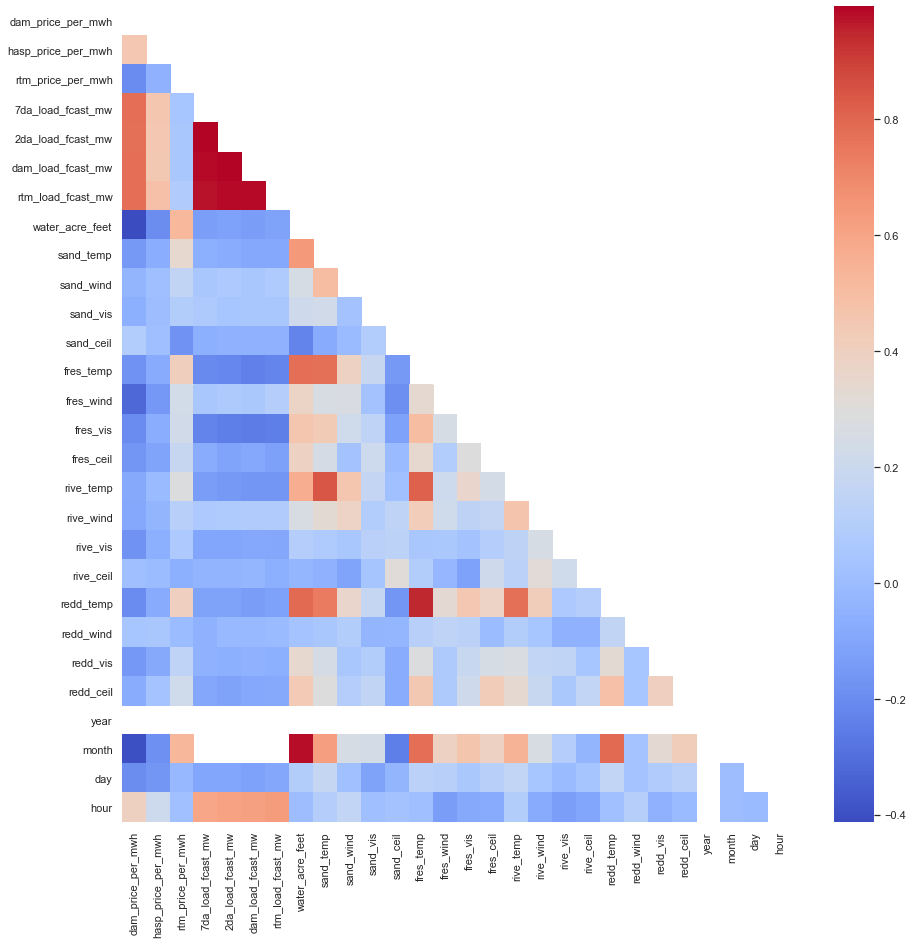

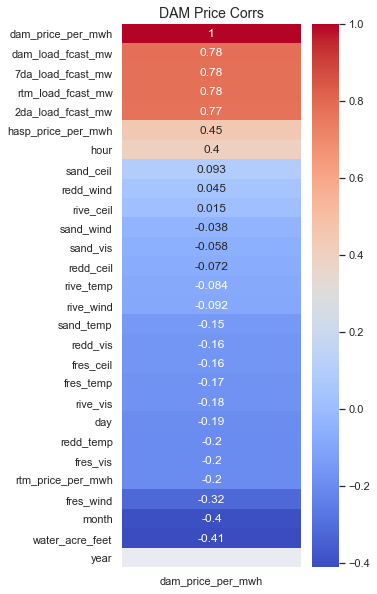

In [227]:
# Correlation Heatmap
plt.figure(figsize=(15,15))
sns.set(font_scale=1)
mask = np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    sns.heatmap(df.corr(), mask=mask, annot=False, cmap='coolwarm')
plt.savefig(r'C:\Users\Hope\Documents\Final Project\images/corr_heatmap.jpg', bbox_inches='tight');
plt.figure(figsize=(4,10))
sns.set(font_scale=1)
sns.heatmap(df.corr()[['dam_price_per_mwh']].sort_values('dam_price_per_mwh', ascending=False), annot=True, cmap='coolwarm');
plt.title('DAM Price Corrs', fontsize=14)
plt.savefig(r'C:\Users\Hope\Documents\Final Project\images/dam_corr_heatmap.jpg', bbox_inches='tight')
plt.show();


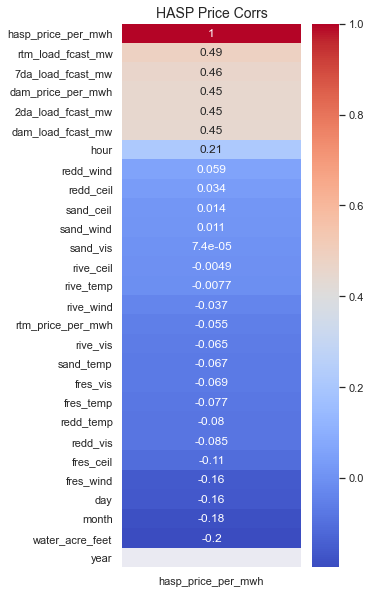

In [228]:
plt.figure(figsize=(4,10))
sns.set(font_scale=1)
sns.heatmap(df.corr()[['hasp_price_per_mwh']].sort_values('hasp_price_per_mwh', ascending=False), annot=True, cmap='coolwarm');
plt.title('HASP Price Corrs', fontsize=14)
plt.savefig(r'C:\Users\Hope\Documents\Final Project\images/hasp_corr_heatmap.jpg', bbox_inches='tight')
plt.show();

In [229]:
# Income For a 1 MW Power Plant
# Adapted timedelta method from StackOverflow
# https://stackoverflow.com/questions/42521107/python-pandas-find-number-of-years-between-twodates
time_horiz_yrs = (df.index[-1] - df.index[0]) / timedelta(days=365)
print(time_horiz_yrs)


0.41621004566210046


In [230]:
dam_ann_inc_1mw = df.dam_price_per_mwh.sum() / time_horiz_yrs
hasp_ann_inc_1mw = df.hasp_price_per_mwh.sum() / time_horiz_yrs
print(dam_ann_inc_1mw)
print(hasp_ann_inc_1mw)


94203.40942907296
90068.88633686231


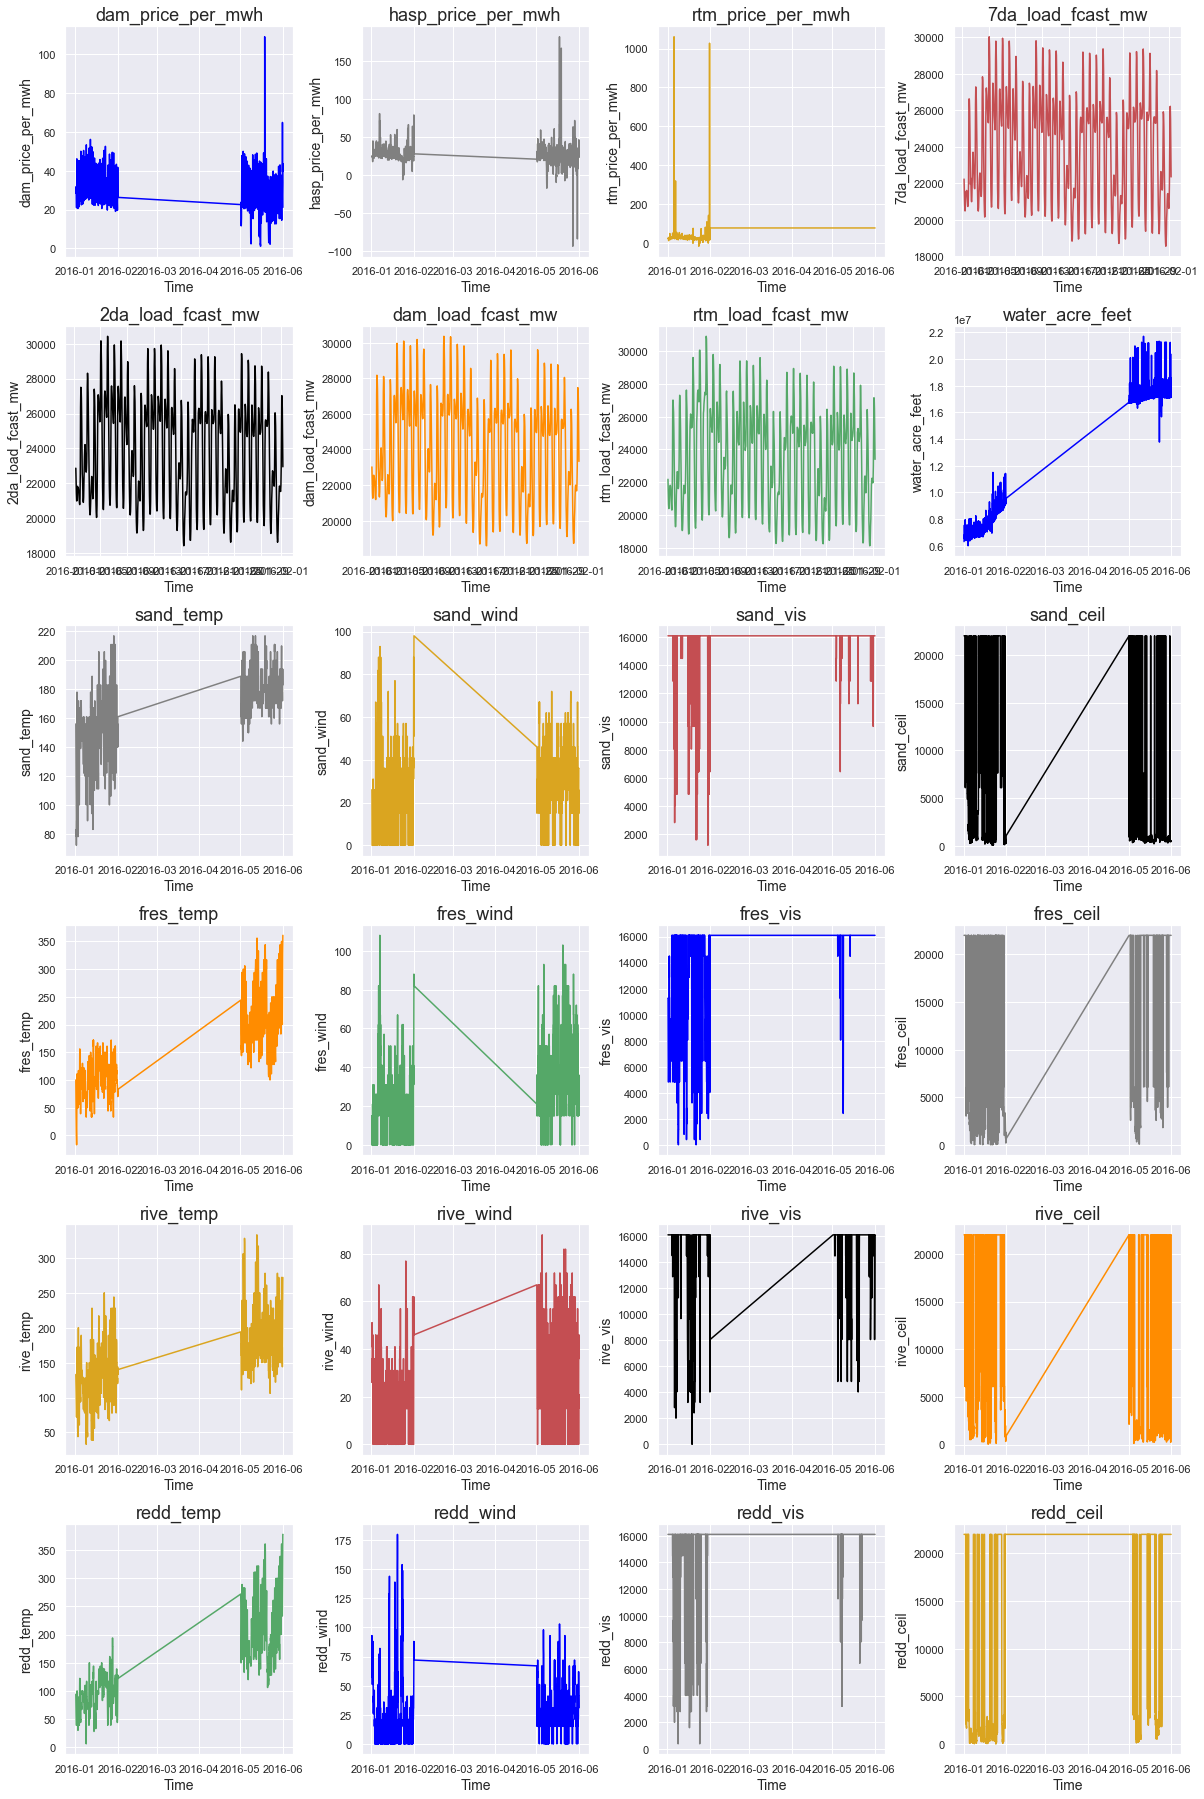

In [231]:
# Data Visualization ... time series
import math
items_to_plot = df.columns[:24]
gen_linecharts(df, items_to_plot, 4, r'C:\Users\Hope\Documents\Final Project\images/all_features_plots.jpg')

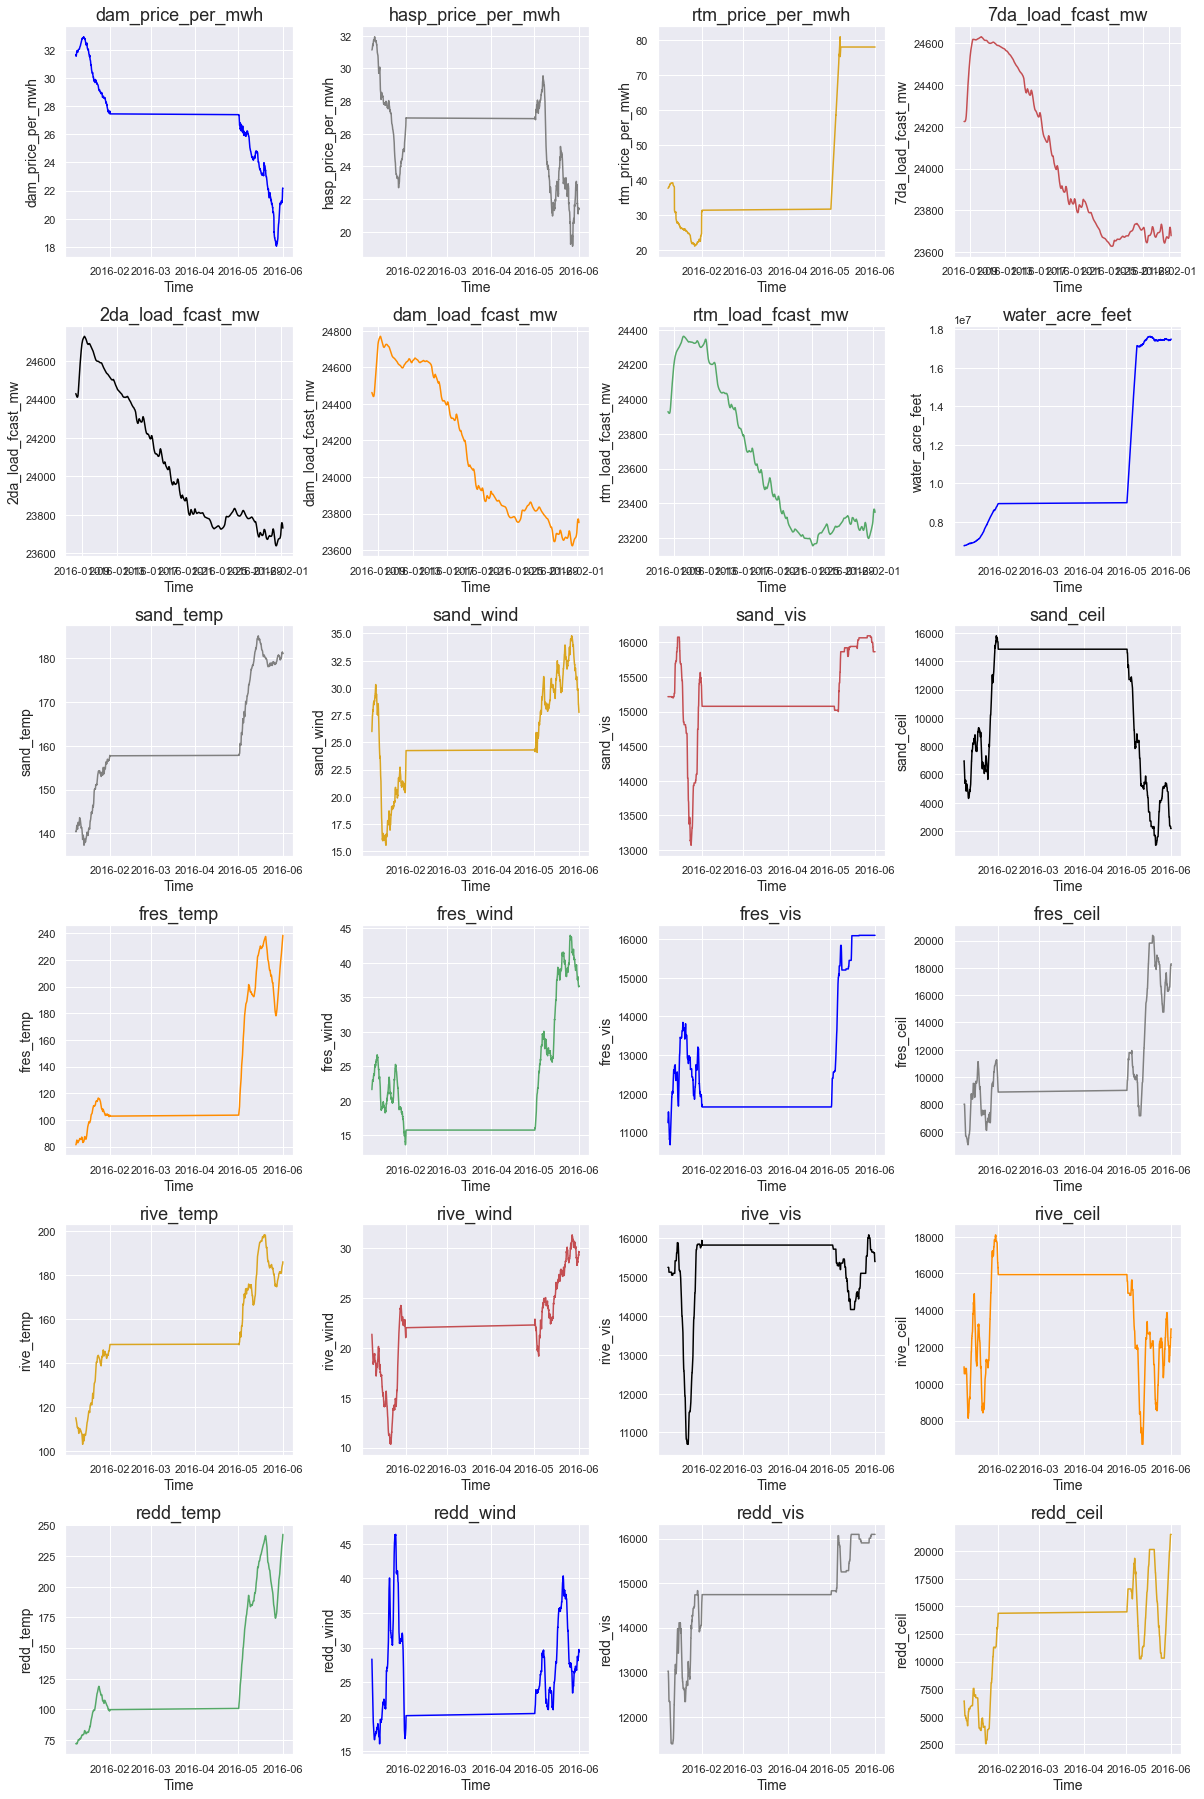

In [232]:
# Time series plots with one-week rolling averages
df = df.replace(to_replace=9999, method='ffill')
gen_linecharts_rolling(df, 24*7, items_to_plot, 4, r'C:\Users\Hope\Documents\Final Project\images/all_feat_mv_avg.jpg')

NormaltestResult(statistic=409.64164538301566, pvalue=1.1154418282719052e-89)

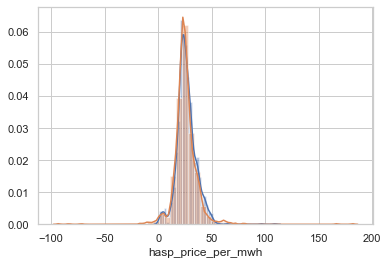

In [233]:
%matplotlib inline
sns.set_style('whitegrid')
sns.distplot(df.dam_price_per_mwh)
sns.distplot(df.hasp_price_per_mwh)
normaltest(df.dam_price_per_mwh)

In [234]:
normaltest(df.hasp_price_per_mwh)

NormaltestResult(statistic=765.3318877332289, pvalue=6.460887313487303e-167)

In [235]:
dam_features = [col for col in df.columns if col != 'dam_price_per_mwh']
print(dam_features)
hasp_features = [col for col in df.columns if col != 'hasp_price_per_mwh']
print(hasp_features)

['hasp_price_per_mwh', 'rtm_price_per_mwh', '7da_load_fcast_mw', '2da_load_fcast_mw', 'dam_load_fcast_mw', 'rtm_load_fcast_mw', 'water_acre_feet', 'sand_temp', 'sand_wind', 'sand_vis', 'sand_ceil', 'fres_temp', 'fres_wind', 'fres_vis', 'fres_ceil', 'rive_temp', 'rive_wind', 'rive_vis', 'rive_ceil', 'redd_temp', 'redd_wind', 'redd_vis', 'redd_ceil', 'year', 'month', 'day', 'hour']
['dam_price_per_mwh', 'rtm_price_per_mwh', '7da_load_fcast_mw', '2da_load_fcast_mw', 'dam_load_fcast_mw', 'rtm_load_fcast_mw', 'water_acre_feet', 'sand_temp', 'sand_wind', 'sand_vis', 'sand_ceil', 'fres_temp', 'fres_wind', 'fres_vis', 'fres_ceil', 'rive_temp', 'rive_wind', 'rive_vis', 'rive_ceil', 'redd_temp', 'redd_wind', 'redd_vis', 'redd_ceil', 'year', 'month', 'day', 'hour']


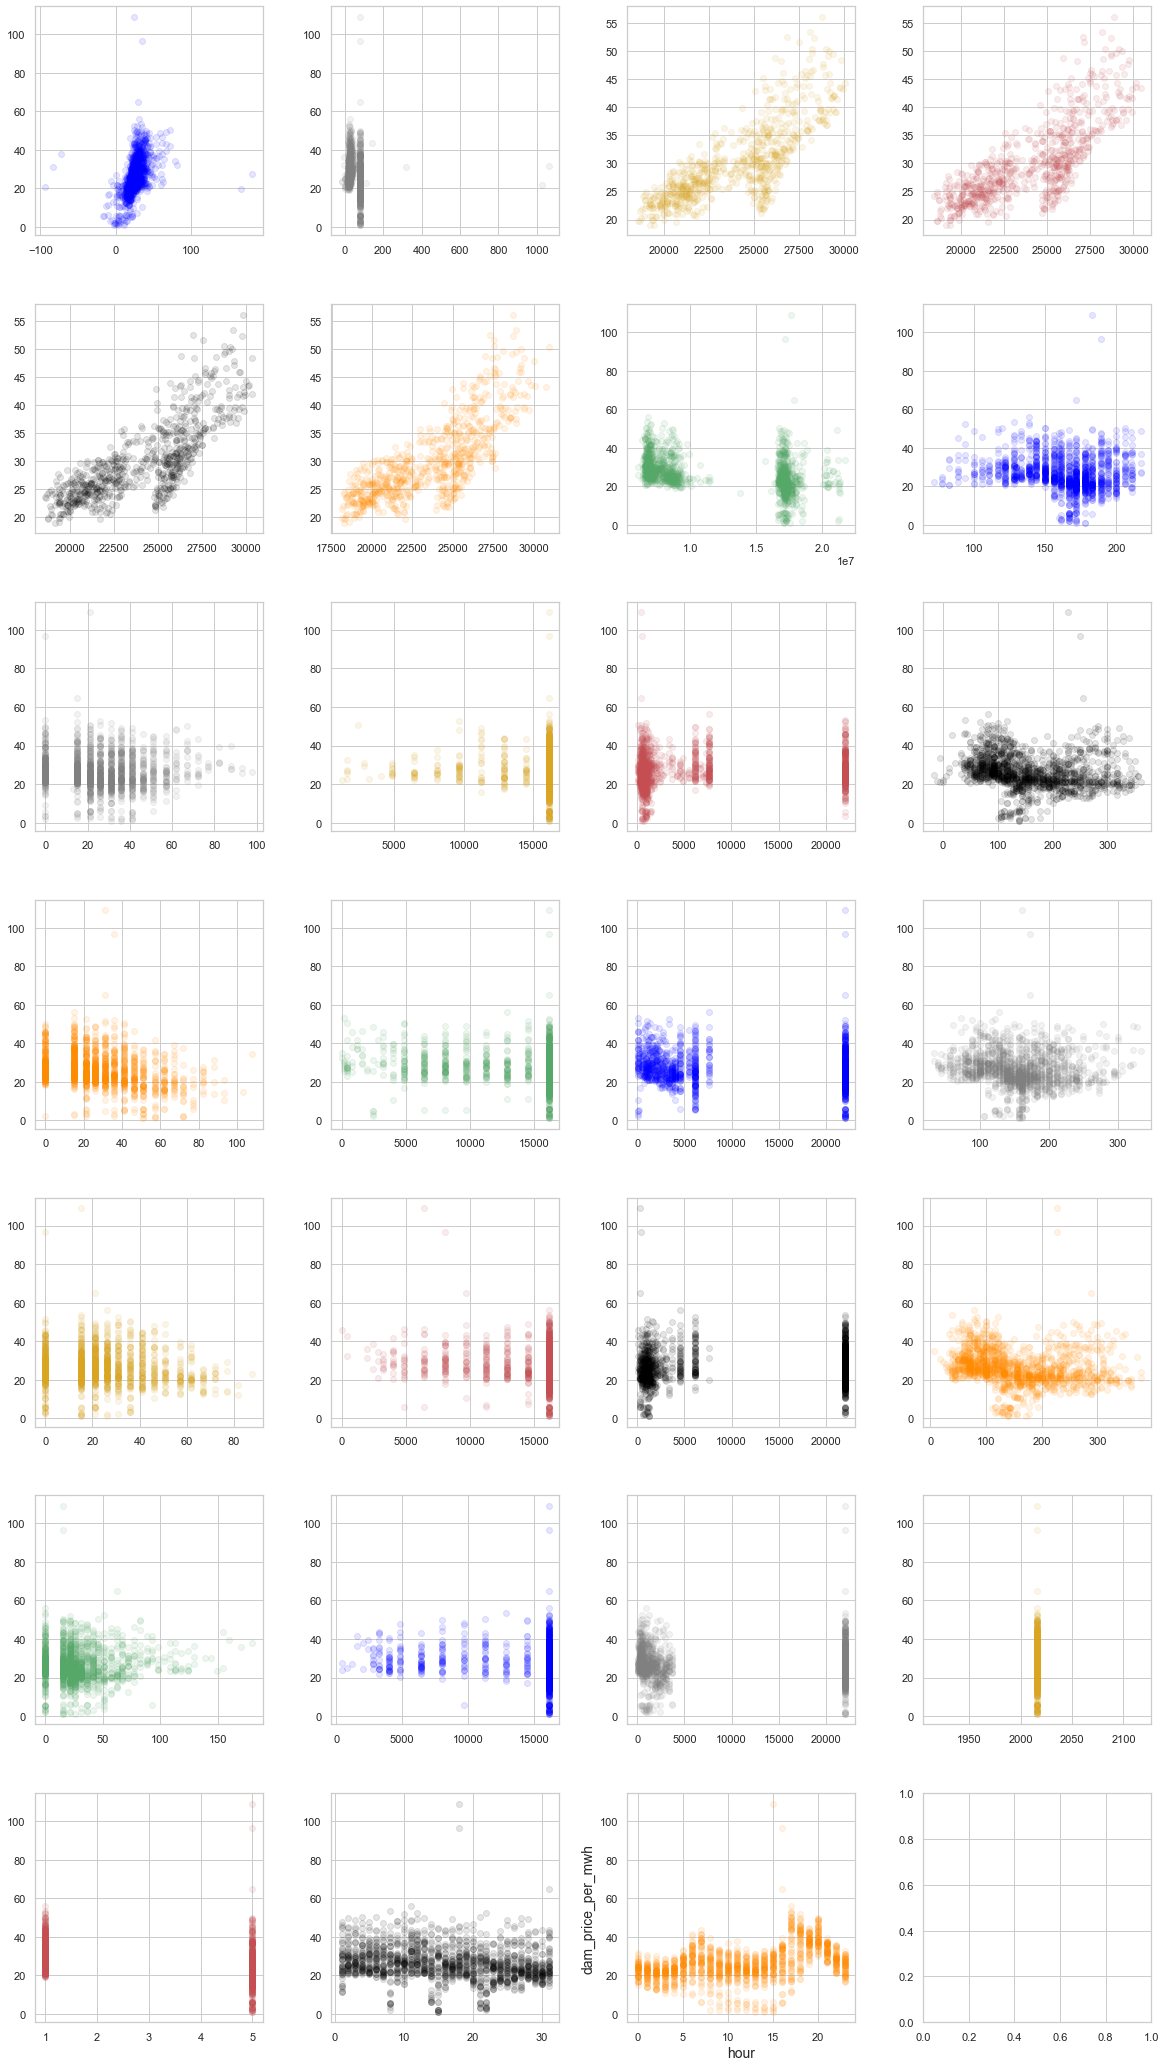

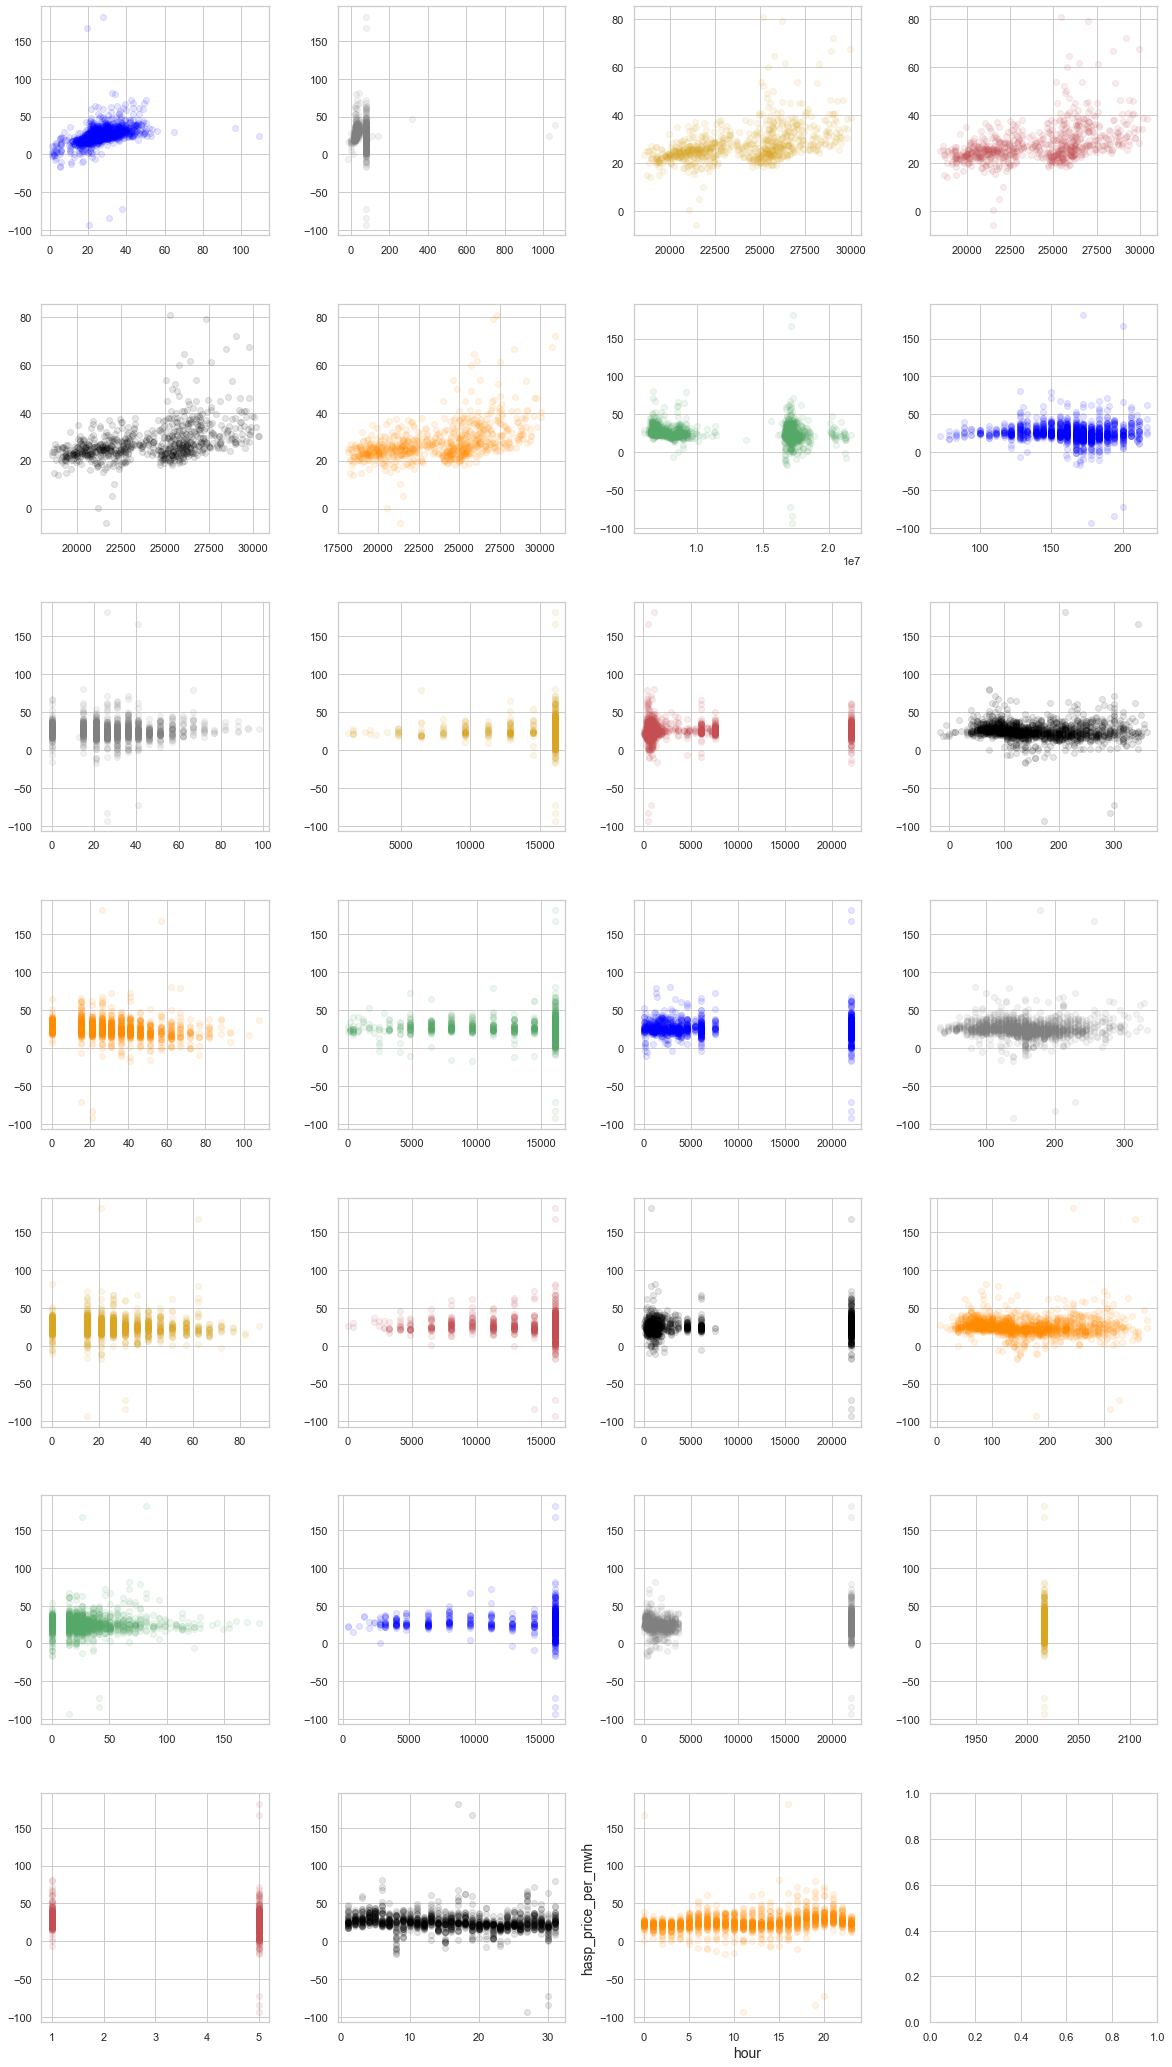

In [236]:
gen_scatterplots(df, 'dam_price_per_mwh', dam_features, 4,r'C:\Users\Hope\Documents\Final Project\images/dam_price_vs_all_scatters')
gen_scatterplots(df, 'hasp_price_per_mwh', hasp_features,4,r'C:\Users\Hope\Documents\Final Project\images/hasp_price_vs_all_scatters')

In [237]:
# *** End of EDA and Inspection

In [238]:
# *** Start ARIMA_Model_Continuous_Targets
import statsmodels.api as sm
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error, r2_score
def interpret_dftest(dftest):
    dfoutput = pd.Series(dftest[0:2], index=['Test Statistic','p-value'])
    return dfoutput

In [240]:
def MSE(true, predicted):
    squared_diff = np.square(true - predicted)
    return np.mean(squared_diff)

In [241]:
# Root Mean Square Error
def RMSE(true, predicted):
    squared_diff = np.square(true - predicted)
    return np.sqrt(np.mean(squared_diff))

In [242]:
# R-squared, coefficient of determination
def R_squared(true, predicted):
    true = np.array(true)
    predicted = np.array(predicted)
    sum_squared_diff = sum(np.square(true - predicted))
    variance = sum(np.square(true - np.mean(true)))
    calc_r2 = 1 - (sum_squared_diff / variance)
    return calc_r2

In [244]:
# Load Pickles: Train/Test Dataframes & Full Dataframe
with open(r'C:\Users\Hope\Documents\Final Project\data/processed/train.pkl', 'rb') as f:
    train = pickle.load(f)
with open(r'C:\Users\Hope\Documents\Final Project\data/processed/test.pkl', 'rb') as f:
    test = pickle.load(f)
with open(r'C:\Users\Hope\Documents\Final Project\data/pre_processed_df.pkl', 'rb') as f:
    df = pickle.load(f)    

In [245]:
# Augmented Dickey-Fuller Test
# P-value for both target variables are extremely low
# (1.4e-19 and 6.5e-28 for day-ahead and hour-ahead prices, respectively),
# so they both pass the the test for stationarity, assuming some low
# threshold for $\alpha$ such as 0.05 or 0.01
# Differencing is not required, so set $d = 0$.

In [246]:
interpret_dftest(adfuller(train['dam_price_per_mwh']))

Test Statistic   -0.501995
p-value           0.891627
dtype: float64

In [247]:
interpret_dftest(adfuller(train['hasp_price_per_mwh']))

Test Statistic   -3.353411
p-value           0.012653
dtype: float64

In [248]:
'''Choose Values for p and q
Endogenous variable: DA price ... $p=1$ ... sharp cutoff in PACF bet. lag-1 & lag-2; ACF lag-1 > 0
Endogenous variable: DA price ... $q=0$ ... ACF lag-1 is not negative
Endogenous variable: HA price ... $p=1$ ... sharp cutoff in PACF bet. lag-1 & lag-2; ACF lag-1 > 0
Endogenous variable: HA price ... $q=0$ ... ACF lag-1 is not negative'''

'Choose Values for p and q\nEndogenous variable: DA price ... $p=1$ ... sharp cutoff in PACF bet. lag-1 & lag-2; ACF lag-1 > 0\nEndogenous variable: DA price ... $q=0$ ... ACF lag-1 is not negative\nEndogenous variable: HA price ... $p=1$ ... sharp cutoff in PACF bet. lag-1 & lag-2; ACF lag-1 > 0\nEndogenous variable: HA price ... $q=0$ ... ACF lag-1 is not negative'

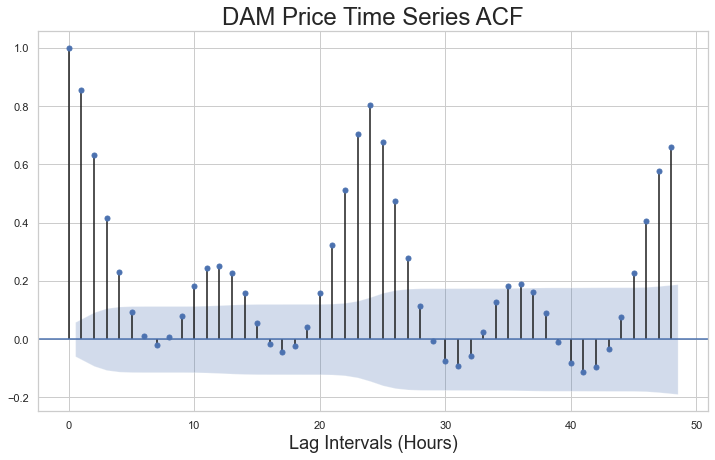

In [249]:
fig, ax = plt.subplots(figsize=(12,7))
plot_acf(train['dam_price_per_mwh'], lags=24*2, ax=ax)
plt.title('DAM Price Time Series ACF', fontsize=24)
plt.xlabel('Lag Intervals (Hours)', fontsize=18)
plt.savefig(r'C:\Users\Hope\Documents\Final Project\images/dam_acf.jpg')
plt.show();

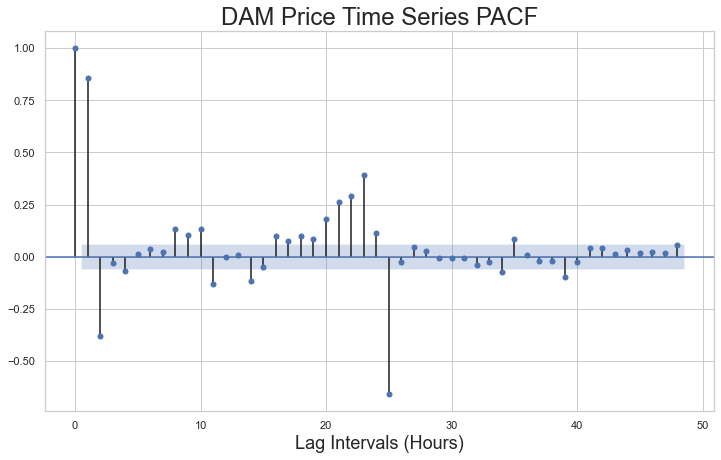

In [250]:
fig, ax = plt.subplots(figsize=(12,7))
plot_pacf(train['dam_price_per_mwh'], lags=24*2, ax=ax)
plt.title('DAM Price Time Series PACF', fontsize=24)
plt.xlabel('Lag Intervals (Hours)', fontsize=18)
plt.savefig(r'C:\Users\Hope\Documents\Final Project\images/dam_pacf.jpg')
plt.show();


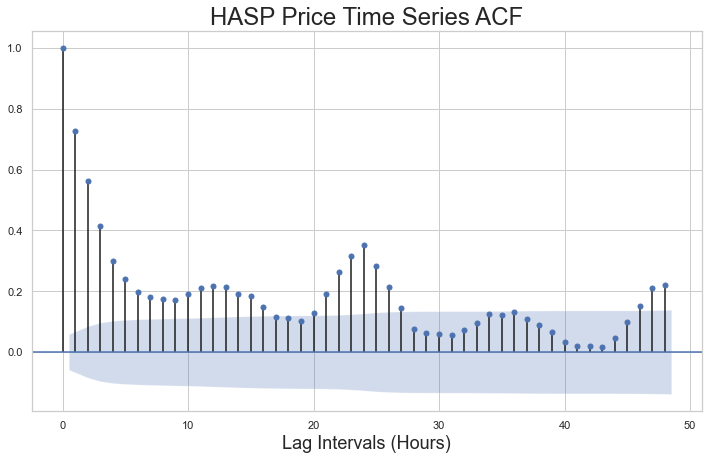

In [251]:
fig, ax = plt.subplots(figsize=(12,7))
plot_acf(train['hasp_price_per_mwh'], lags=24*2, ax=ax)
plt.title('HASP Price Time Series ACF', fontsize=24)
plt.xlabel('Lag Intervals (Hours)', fontsize=18)
plt.savefig(r'C:\Users\Hope\Documents\Final Project\images/hasp_acf.jpg')
plt.show();

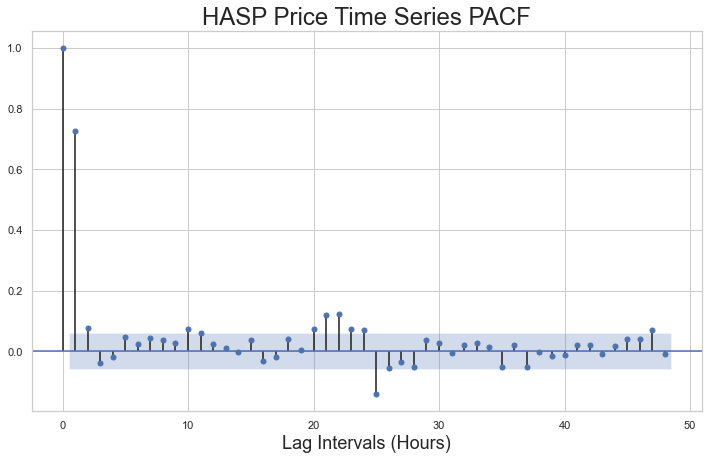

In [252]:
fig, ax = plt.subplots(figsize=(12,7))
plot_pacf(train['hasp_price_per_mwh'], lags=24*2, ax=ax)
plt.title('HASP Price Time Series PACF', fontsize=24)
plt.xlabel('Lag Intervals (Hours)', fontsize=18)
plt.savefig(r'C:\Users\Hope\Documents\Final Project\images/hasp_pacf.jpg')
plt.show();


In [253]:
# *** skip dur cls this takes v long time***
# this will take a few hours
# v need to reduce the range(7) to lower val
# Gridsearch to find lowest MSE params for p, d, q
# (for DAM and HASP prices as endogenous variables)

In [265]:
num = 2
for p in range(num): #range(7):
    for d in range(num): #range(7):
        for q in range(num): #range(7):
            try:
                dam_arima = ARIMA(endog = train['dam_price_per_mwh'].astype('float32'), # Y variable
                order = (p, d, q)) # (p, d, q)
                dam_model = dam_arima.fit()
                dam_preds = dam_model.predict()
                print(f'MSE for (p={p}, d={d}, q={q}) ... {mean_squared_error(train["dam_price_per_mwh"], dam_preds)}')
            except:
                pass

C:\Users\Hope\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\Hope\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\Hope\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\Hope\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associa

MSE for (p=0, d=0, q=0) ... 65.21880822605455
MSE for (p=0, d=0, q=1) ... 27.64688761140555
MSE for (p=1, d=0, q=0) ... 17.326157404301945
MSE for (p=1, d=0, q=1) ... 15.203805088711094


C:\Users\Hope\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\Hope\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\Hope\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\Hope\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associa

In [266]:
for p in range(num): #range(7):
    for d in range(num): #range(7):
        for q in range(num): #range(7):
            try:
                hasp_arima = ARIMA(endog = train['hasp_price_per_mwh'].astype('float32'), # Y variable
                order = (p, d, q)) # (p, d, q)
                hasp_model = hasp_arima.fit()
                hasp_preds = hasp_model.predict()
                print(f'MSE for (p={p}, d={d}, q={q}) ... {mean_squared_error(train["hasp_price_per_mwh"], hasp_preds):.2f}')
            except:
                pass

C:\Users\Hope\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\Hope\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\Hope\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\Hope\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associa

MSE for (p=0, d=0, q=0) ... 82.62
MSE for (p=0, d=0, q=1) ... 52.37
MSE for (p=1, d=0, q=0) ... 39.06
MSE for (p=1, d=0, q=1) ... 38.85


C:\Users\Hope\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\Hope\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
